In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
date = 'Дата замера'
hole = 'Скважина'
x1 = 'Способ эксплуатации'
x2 = 'Режим'
X = [x1, x2]
y1 = 'Рпр(ТМ)'
y2 = 'Рзаб(Рпр)'
y3 = 'Рзаб(Нд)'
y4 = 'Рзаб(иссл)'
Y = [y1, y2, y3, y4]
def load_some_data(path, separ = ':'):
    return pd.read_csv(path, sep=separ, parse_dates = [date], index_col = date,  encoding='cp1251')


In [2]:
df = load_some_data('data2.csv')
df.loc[df[hole] == '2']

Скважина       Способ эксплуатации Режим  Рпр(ТМ)  Рзаб(Рпр)  \
Дата замера                                                                
2018-01-01         2                       NaN   АПВ      NaN       47.2   
2018-01-02         2                       NaN   АПВ      NaN       47.2   
2018-01-03         2                       NaN   АПВ      NaN       47.2   
2018-01-04         2                       NaN   АПВ      NaN       47.2   
2018-01-05         2                       NaN   АПВ      NaN       47.2   
2018-01-06         2                       NaN   АПВ      NaN       47.2   
2018-01-07         2                       NaN   АПВ      NaN       45.2   
2018-01-08         2                       NaN   АПВ      NaN       45.2   
2018-01-09         2                       NaN   АПВ      NaN       45.2   
2018-01-10         2                       NaN   АПВ      NaN       47.2   
2018-01-11         2                       NaN   АПВ      NaN       47.2   
2018-01-12         2                       NaN   АПВ      NaN       47.2   
2018-01-13         2                       NaN   АПВ      NaN       47.2   
2018-01-14         2                       NaN   АПВ      NaN       47.2   
2018-01-15         2                       NaN   АПВ      NaN       47.2   
2018-01-16         2                       NaN   АПВ      NaN       47.1   
2018-01-17         2                       NaN   АПВ      NaN       47.1   
2018-01-18         2                       NaN   АПВ      NaN       47.1   
2018-01-19         2                       NaN   АПВ      NaN       47.1   
2018-01-20         2                       NaN   АПВ      NaN       47.1   
2018-01-21         2                       NaN   АПВ      NaN       47.1   
2018-01-22         2                       NaN   АПВ      NaN       47.2   
2018-01-23         2                       NaN   АПВ      NaN       47.2   
2018-01-24         2                       NaN   АПВ      NaN       47.2   
2018-01-25         2                       NaN   АПВ      NaN       47.2   
2018-01-26         2                       NaN   АПВ      NaN       47.2   
2018-01-27         2                       NaN   АПВ      NaN       47.2   
2018-01-28         2                       NaN   АПВ      NaN        NaN   
2018-01-29         2                       NaN   АПВ      NaN        NaN   
2018-01-30         2                       NaN   АПВ      NaN        NaN   
...              ...                       ...   ...      ...        ...   
2018-07-02         2  Электропогружным насосом   АПВ      NaN       47.6   
2018-07-03         2  Электропогружным насосом   АПВ      NaN       47.6   
2018-07-04         2  Электропогружным насосом   АПВ      NaN       47.7   
2018-07-05         2  Электропогружным насосом   АПВ      NaN       47.7   
2018-07-06         2  Электропогружным насосом   АПВ      NaN       47.7   
2018-07-07         2  Электропогружным насосом   АПВ      NaN       47.7   
2018-07-08         2  Электропогружным насосом   АПВ      NaN       47.7   
2018-07-09         2  Электропогружным насосом   АПВ      NaN       47.7   
2018-07-10         2  Электропогружным насосом   АПВ      NaN       47.7   
2018-07-11         2  Электропогружным насосом   АПВ      NaN       47.7   
2018-07-12         2  Электропогружным насосом   АПВ      NaN       47.6   
2018-07-13         2  Электропогружным насосом   АПВ      NaN       47.6   
2018-07-14         2  Электропогружным насосом   АПВ      NaN       47.6   
2018-07-15         2  Электропогружным насосом   АПВ      NaN       47.6   
2018-07-16         2  Электропогружным насосом   АПВ      NaN       47.7   
2018-07-17         2  Электропогружным насосом   АПВ      NaN       47.7   
2018-07-18         2  Электропогружным насосом   АПВ      NaN       47.7   
2018-07-19         2  Электропогружным насосом   АПВ      NaN       47.7   
2018-07-20         2  Электропогружным насосом   АПВ      NaN       47.8   
2018-07-21         2  Электропогружным насосом   АПВ      Na

In [3]:
import datetime
#самые полные данные, где всегда есть режим и способ
#отбросили январь, ибо данные пропущены
filtered = df.loc[df.index.date >= datetime.date(2018,2,1)]
tmp = filtered[[hole,x1,x2]]
tmp[X] = tmp[X].isnull()
tmp = tmp.loc[(tmp[x1]) | (tmp[x2])]
nulls = tmp.groupby(hole).count().reset_index()[hole]
useful = filtered.loc[~filtered[hole].isin(nulls)]

D:\anaconda\envs\foo\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [4]:
#выставление категорий
cats_x1 = useful[x1].astype('category').cat.categories
useful[x1] = useful[x1].astype('category').cat.codes
cats_x2 = useful[x2].astype('category').cat.categories
useful[x2] = useful[x2].astype('category').cat.codes

D:\anaconda\envs\foo\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\anaconda\envs\foo\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [36]:
#useful.loc[useful[hole] == '1009-2']

In [8]:
spaces = useful.set_index([hole]).isnull()
spaces = spaces.groupby(spaces.index).sum()[Y]
not_spaces = useful.set_index([hole]).notna()
not_spaces = not_spaces.groupby(not_spaces.index).sum()[Y]
res = pd.DataFrame()
nsp = not_spaces.sum(axis = 1)
sp = spaces.sum(axis = 1)
#сформировали массив с отношением заполненных давлений
res['factor'] = nsp/(sp + nsp)
res.sort_values(by = ['factor'], inplace = True)
#итоговая выборка
targets = res.loc[res['factor'] > res['factor'].median()]
#232 скважина уникальная
targets  = targets.loc[targets.index != '232']

In [32]:
from sklearn import preprocessing
from numpy import nan
#очистка выборосов и нормализация
def transform(d):
    df = d.copy()
    scaler = preprocessing.MinMaxScaler()
    for y in Y:
        #df[y].interpolate(inplace = True)
        down_quan = df[y].quantile(0.25)
        up_quan = df[y].quantile(0.75)
        df.loc[(df[y] < down_quan) | (df[y] > up_quan),y] = nan
        #df[y] = df[y].rolling(4).mean()
        
        #df[y].interpolate(inplace = True)
        df[y] =  scaler.fit_transform(df[[y]])
        #df[y] = df[y]/ df[y].max()
    return df

In [33]:
hole_232 = useful.loc[useful[hole] == '232']
final = transform(useful.loc[useful[hole].isin(targets.index)])

In [16]:
#загрузка в csv для инфлюкса
def load_before_influx(df, csv_name):
    for_influx = df.copy()
    for_influx.index.names=['date']
    for_influx.columns = ['hole','method','mode', 'P(TM)','P(rpr)', 'P(nd)', 'P(issl)']
    for_influx.to_csv(csv_name)

In [35]:
#load_before_influx(df, 'raw.csv')
#load_before_influx(useful, 'useful.csv')
load_before_influx(final, 'final.csv')
load_before_influx(hole_232, '232.csv')

In [12]:
import os
%matplotlib inline

def create_directory(dir):
    if not os.path.exists(dir):
        os.makedirs(dir)
    return dir
def draw_plot(name_hole, data_to_draw, what_to_do ='see', Y = Y):
    formatter = ticker.FormatStrFormatter('%.0f')
    fig, axes = plt.subplots(1,2)
    for y in Y:
        axes[0].plot(data_to_draw[y], label = y)
    axes[0].legend()
    axes[0].set_title('Измерения давлений')
    axes[0].set_xlabel(date, fontsize = 12)
    axes[0].set_ylabel('P', fontsize = 12)
    
    axes[1].plot(data_to_draw[x1], label = x1)
    axes[1].plot(data_to_draw[x2], label = x2)
    axes[1].set_title(x1 + 'and' + x2)
    axes[1].legend()
    axes[1].set_xlabel(date, fontsize = 12)
    axes[1].set_ylabel('№', fontsize = 12)
    axes[1].yaxis.set_major_formatter(formatter)
    fig.set_figwidth(15)
    fig.set_figheight(8)
    fig.suptitle(hole + ' ' + str(name_hole))
    plt.legend()
    if (what_to_do == 'save'):
        plt.savefig(create_directory('diagrams') + '/' + name_hole + '.png',
                    dpi = 100, format = 'png')
    else:
        plt.show()

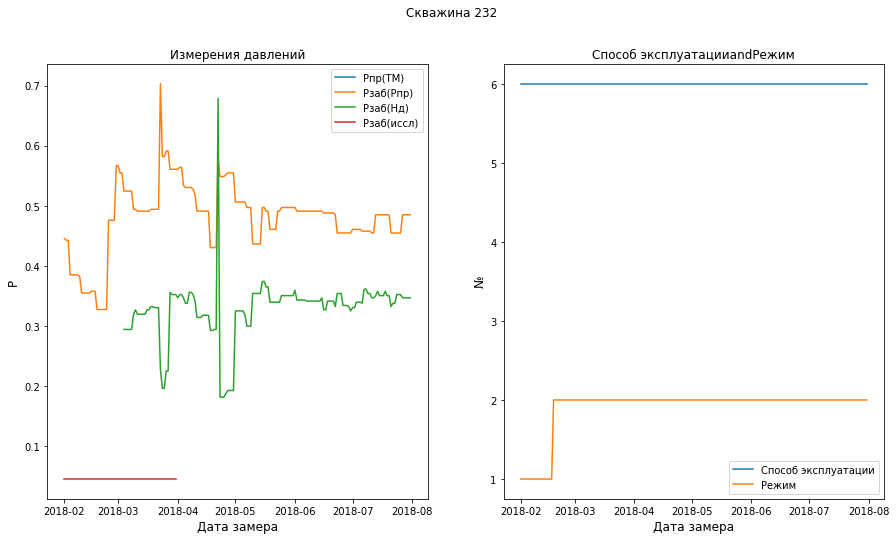

In [34]:
draw_plot(232, final[final[hole] == '707'])

D:\anaconda\envs\foo\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


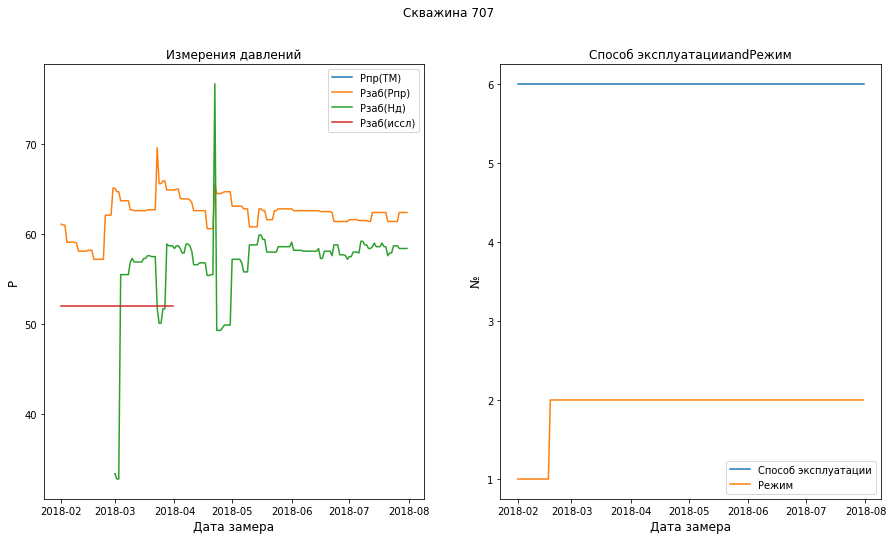

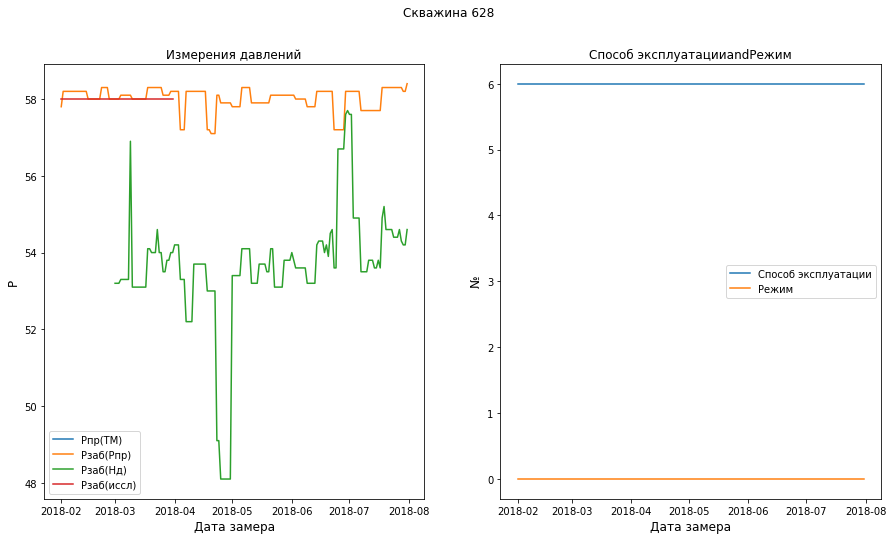

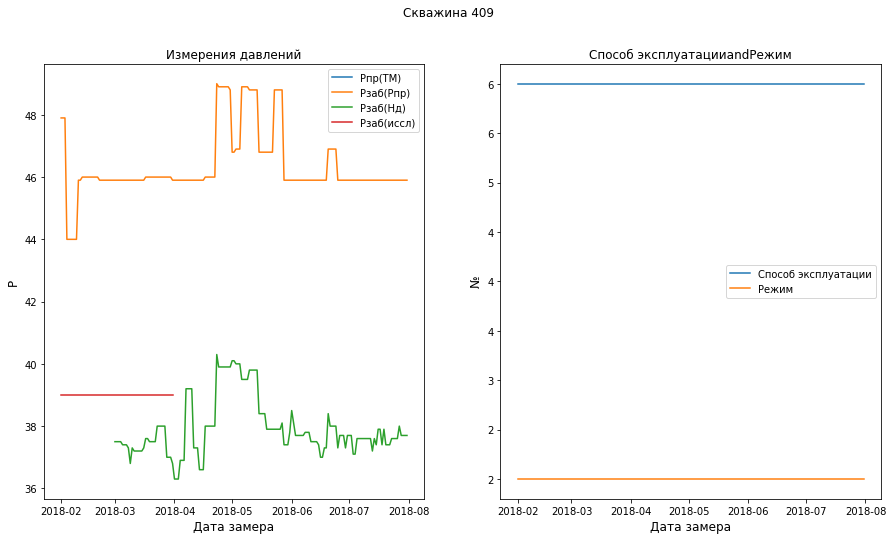

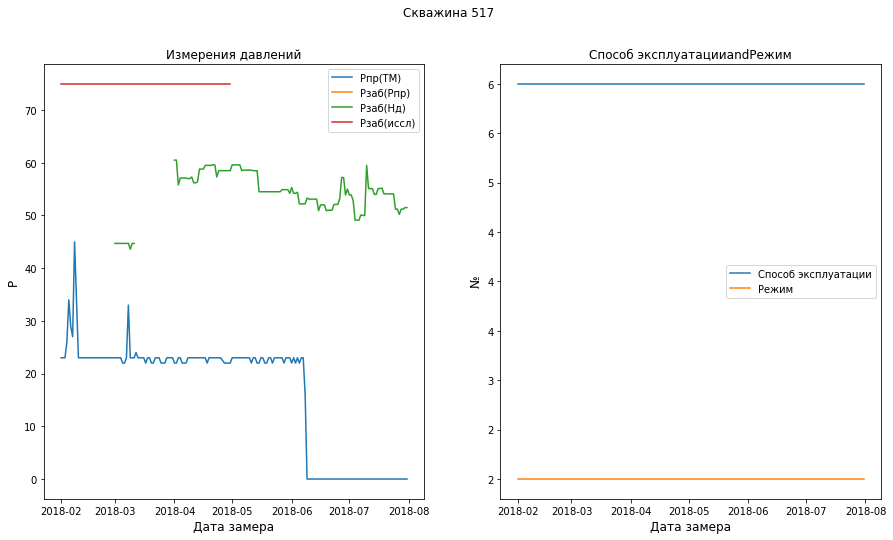

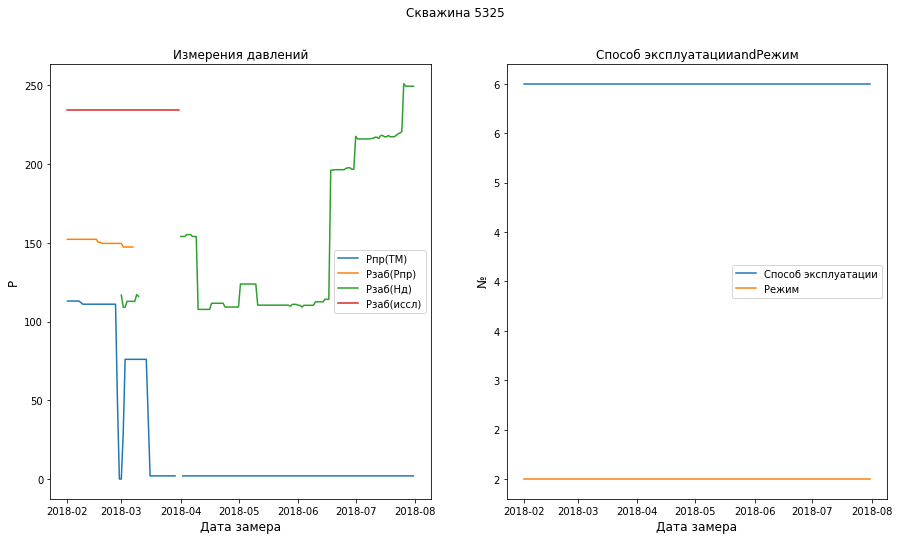

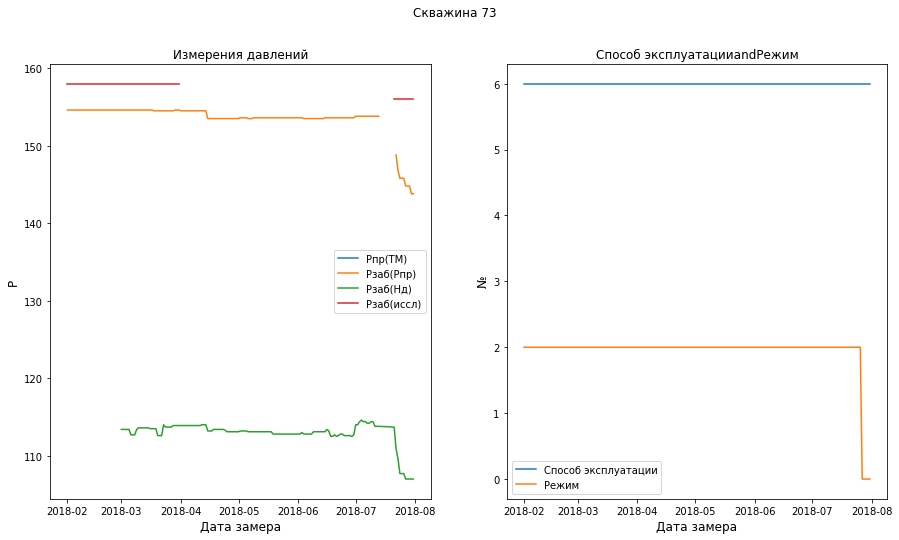

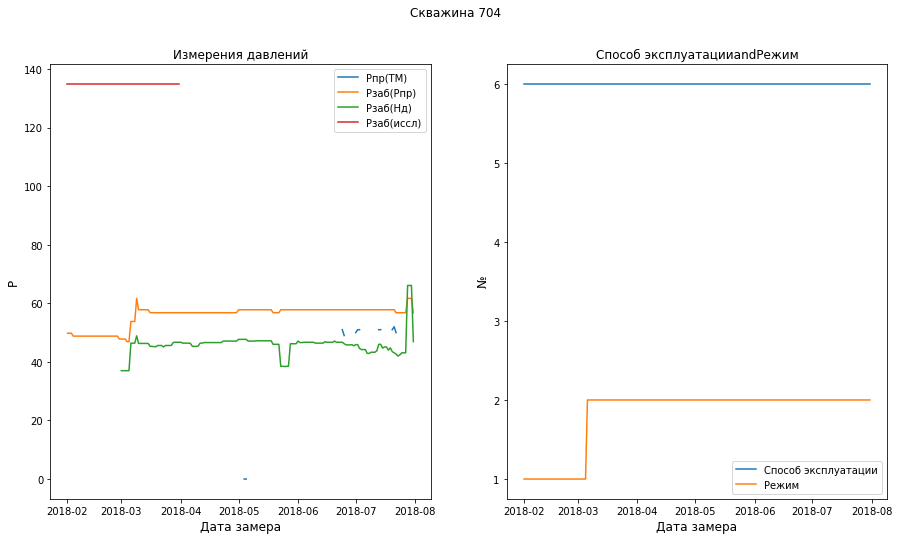

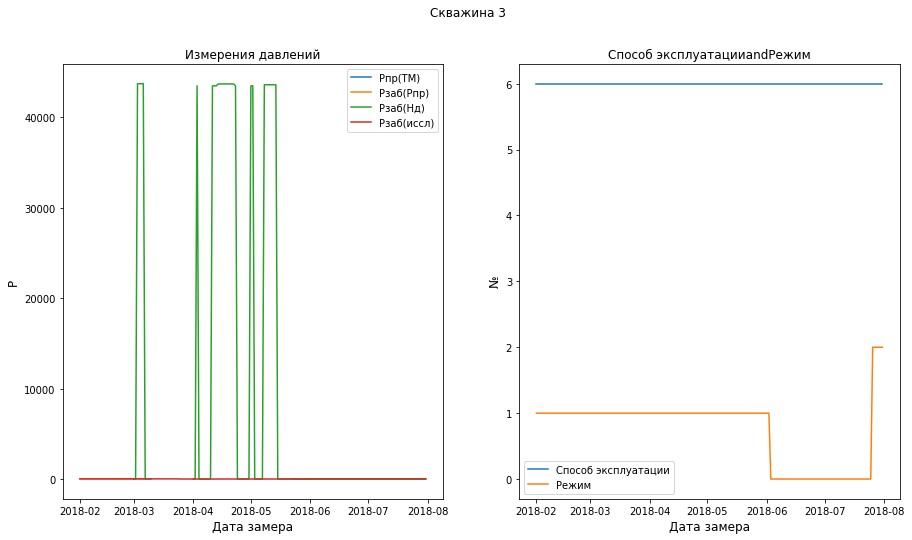

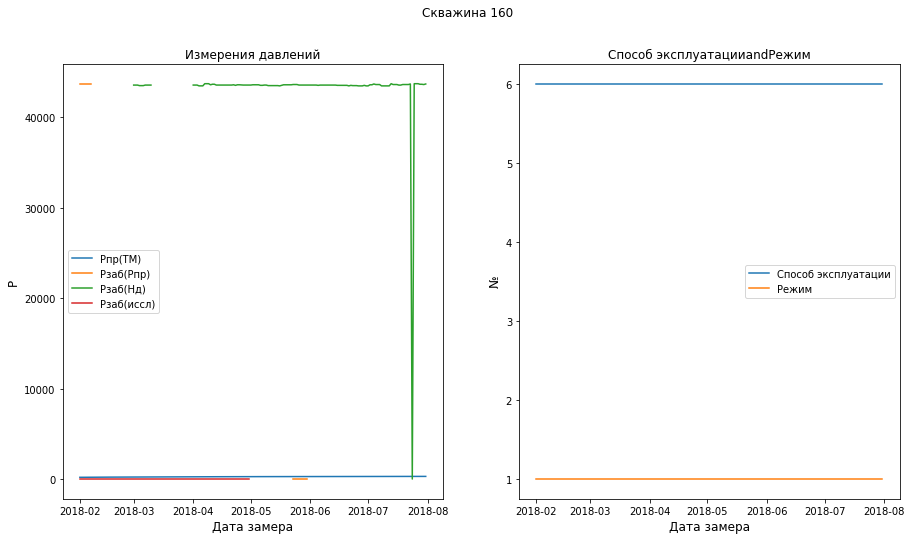

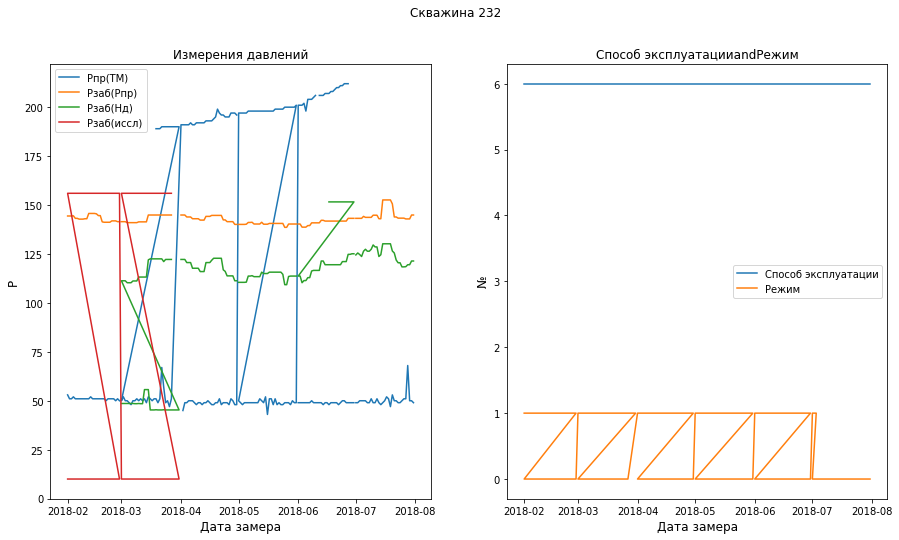

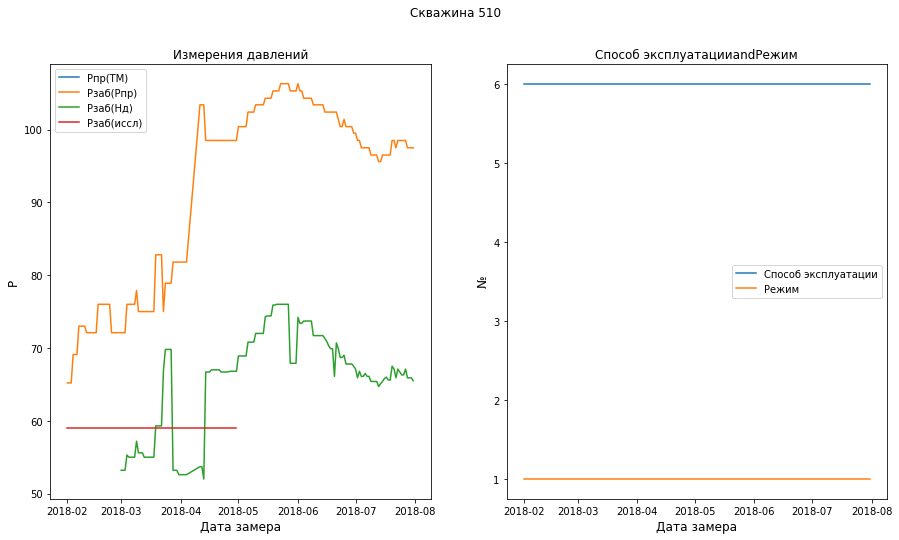

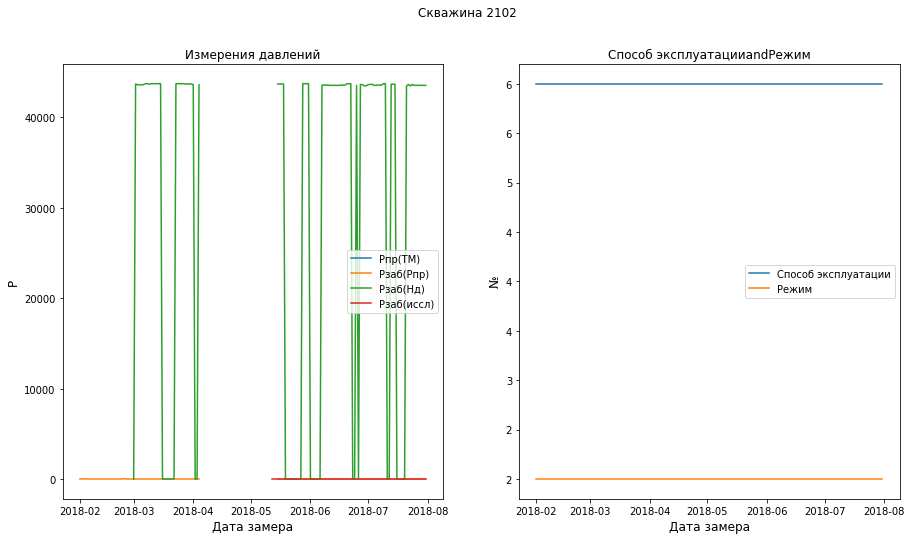

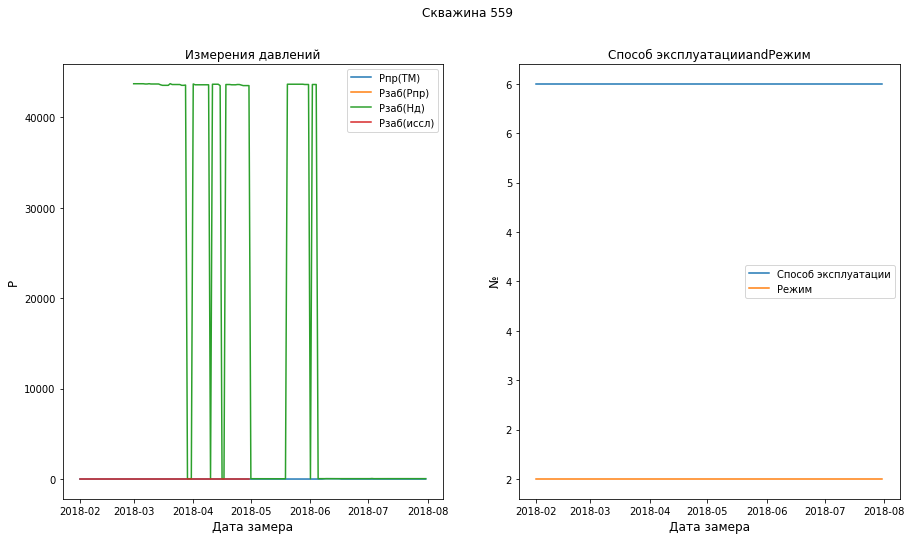

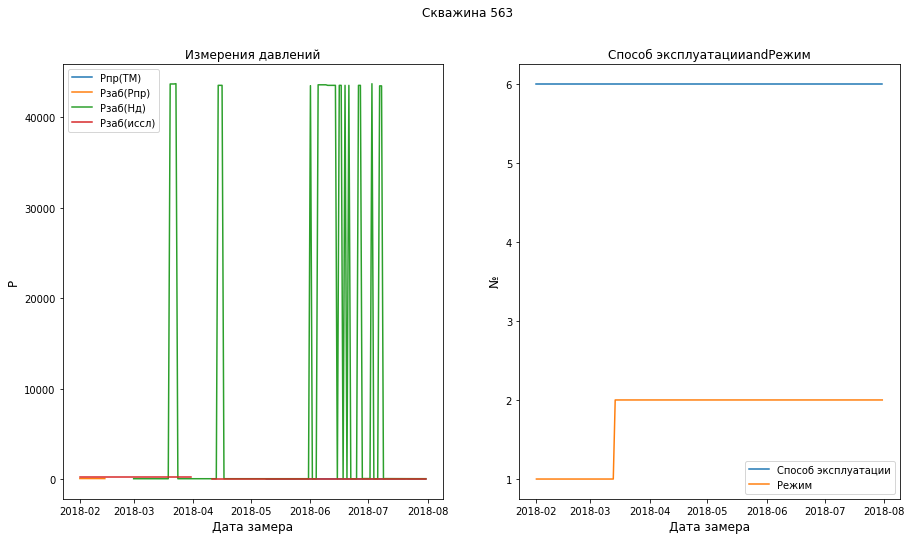

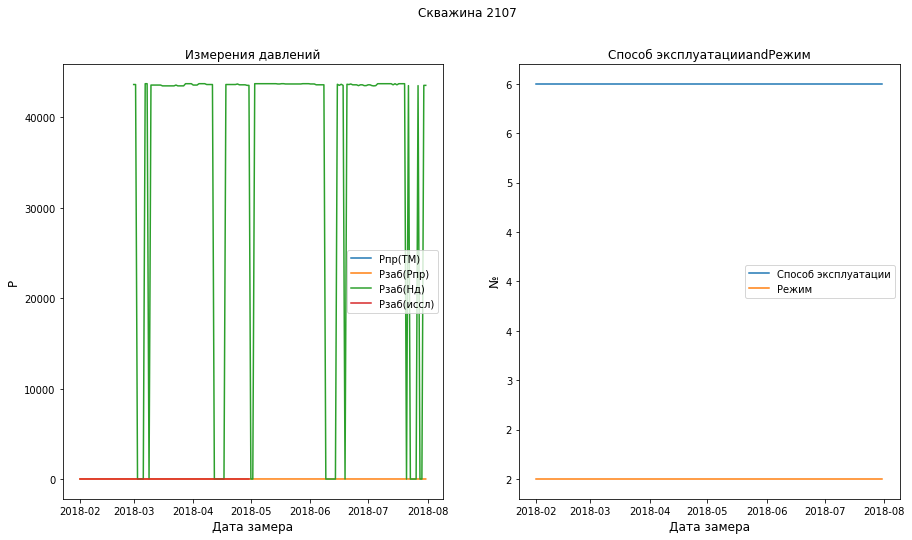

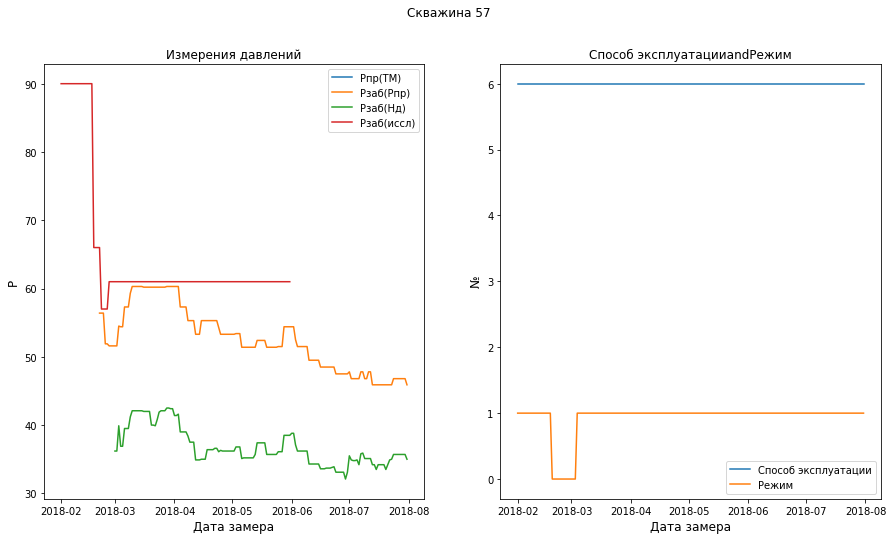

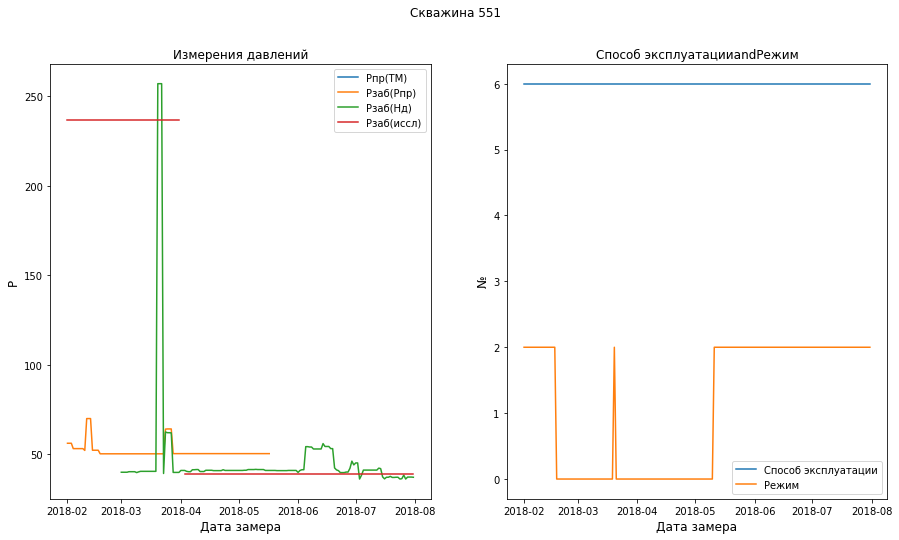

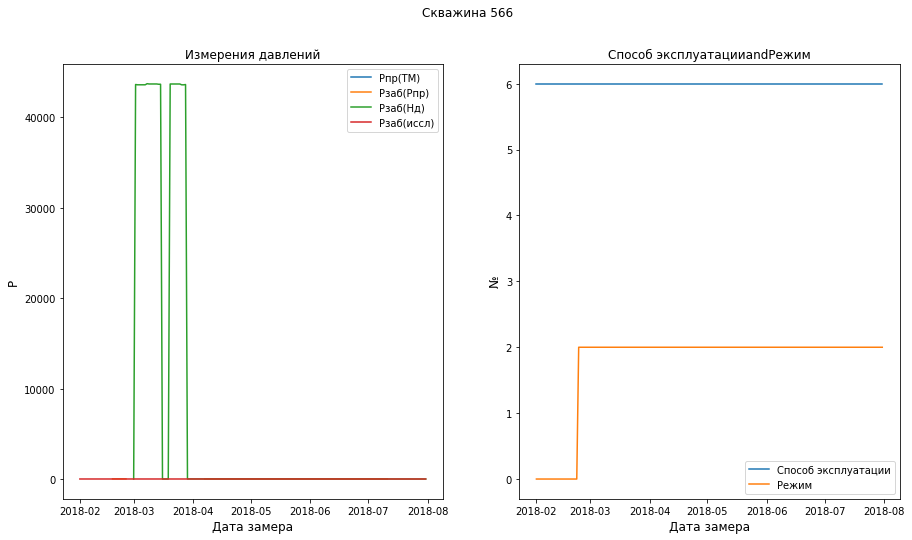

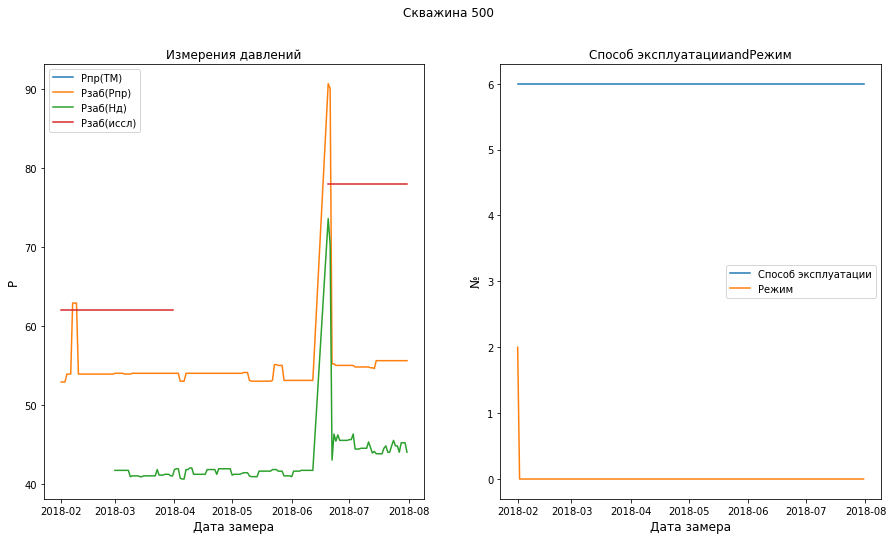

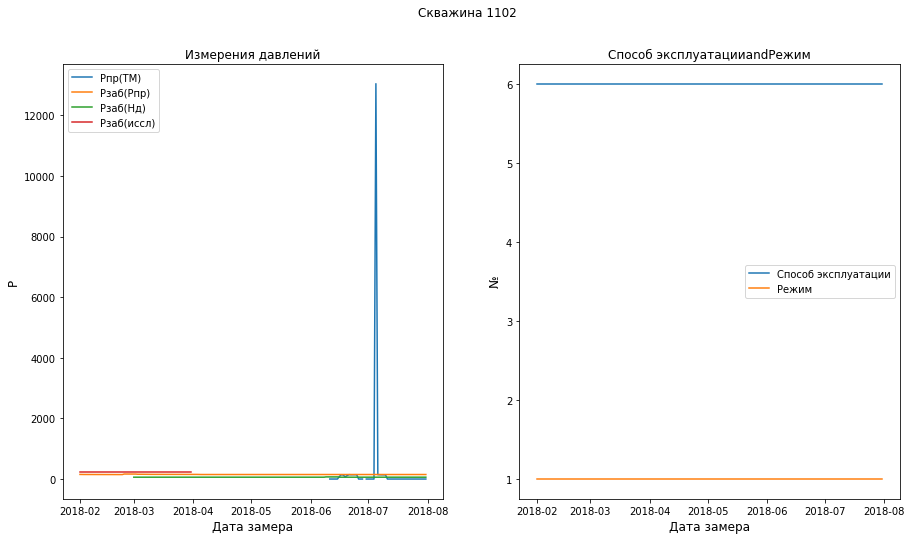

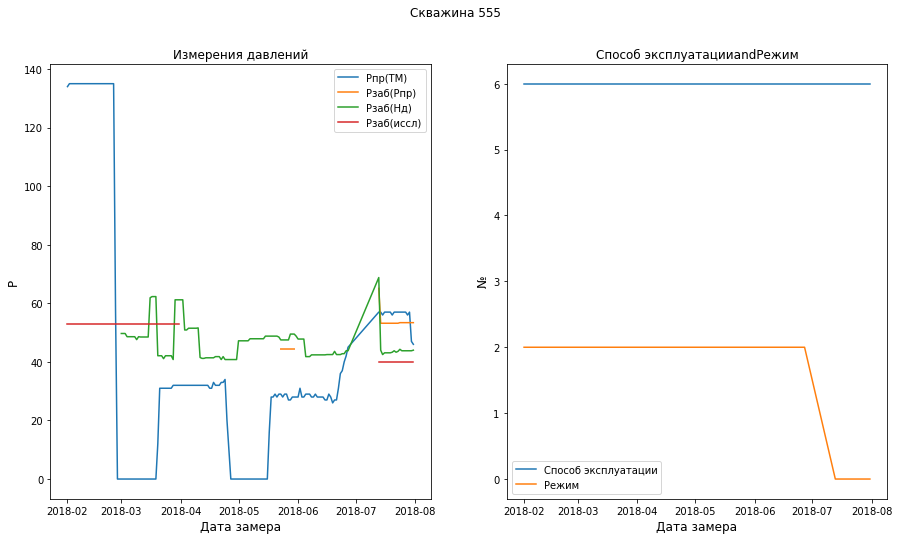

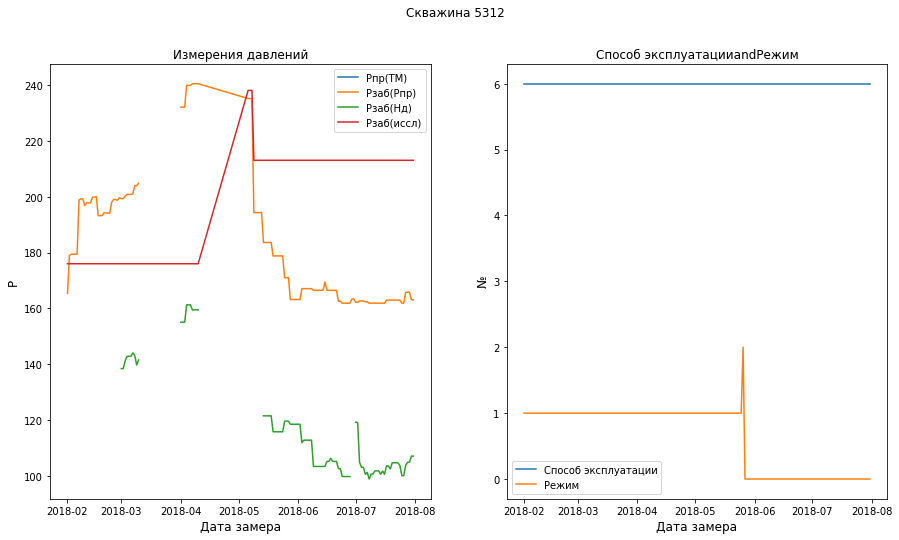

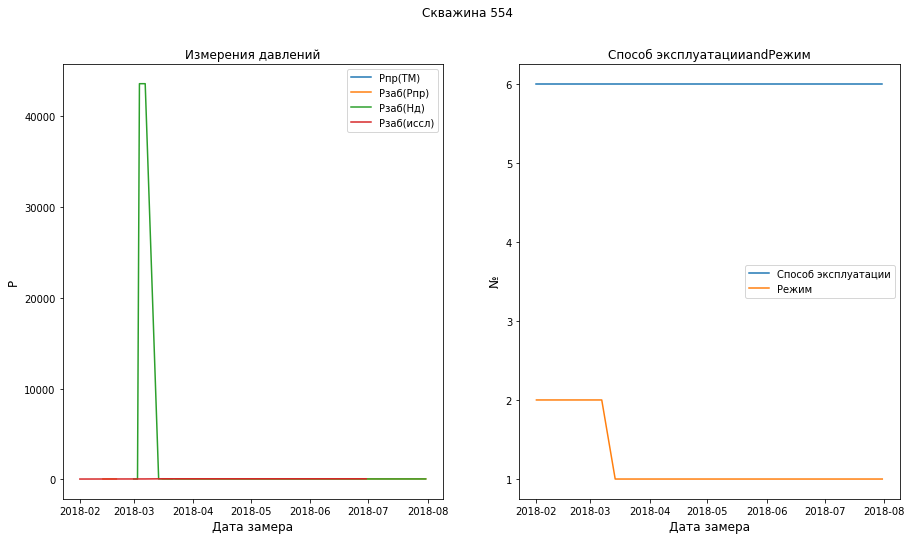

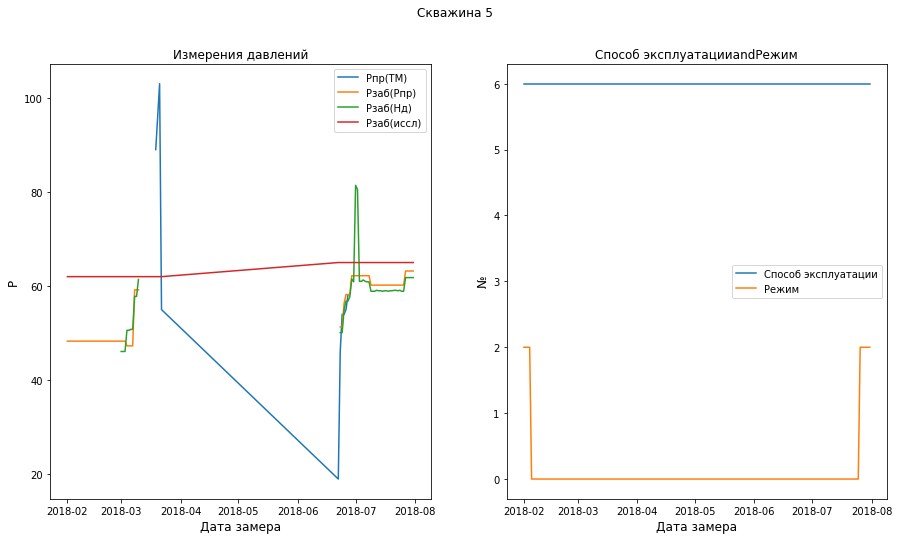

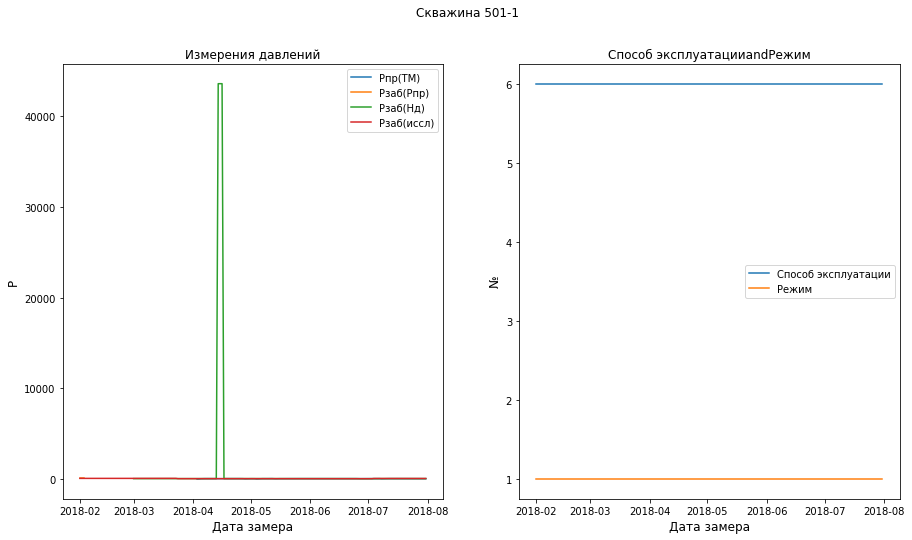

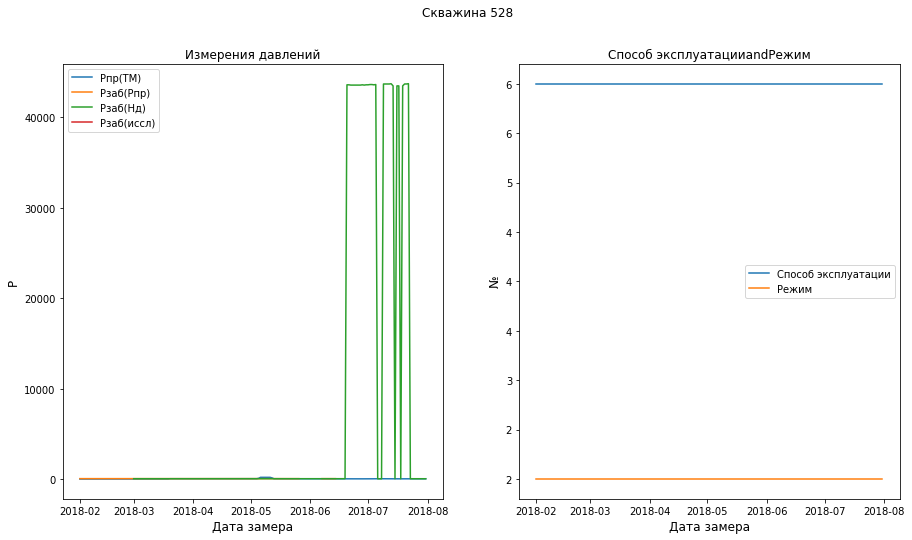

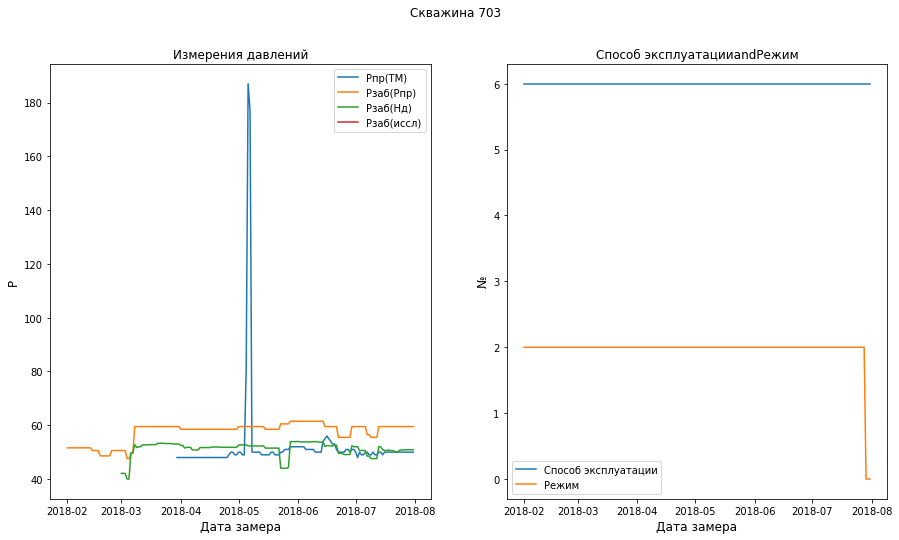

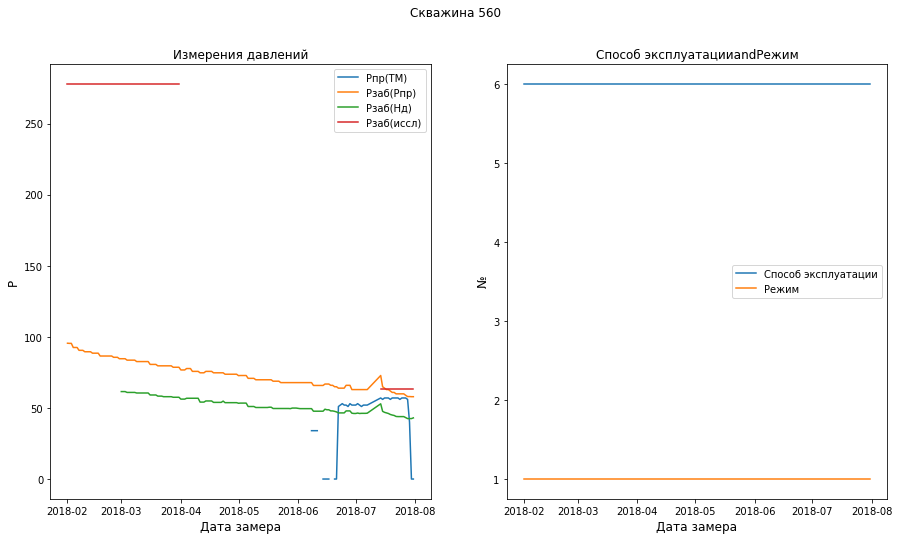

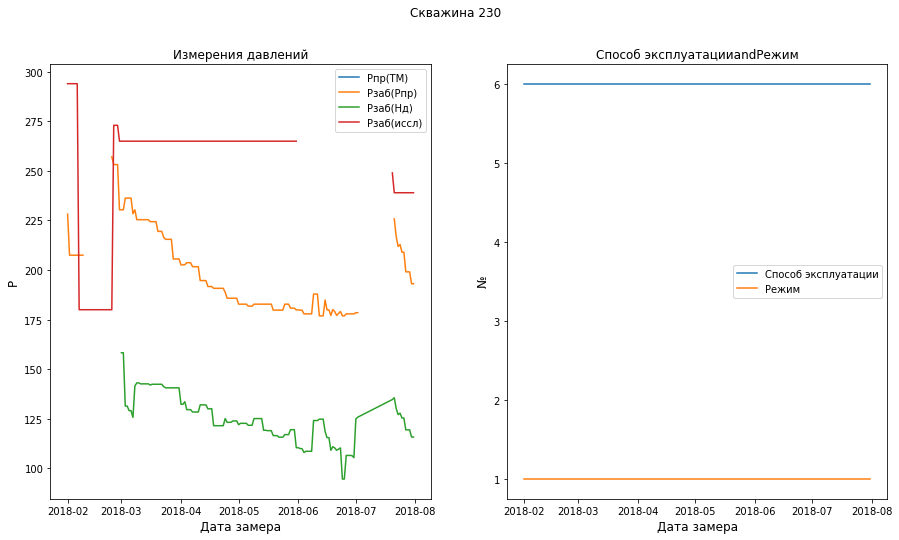

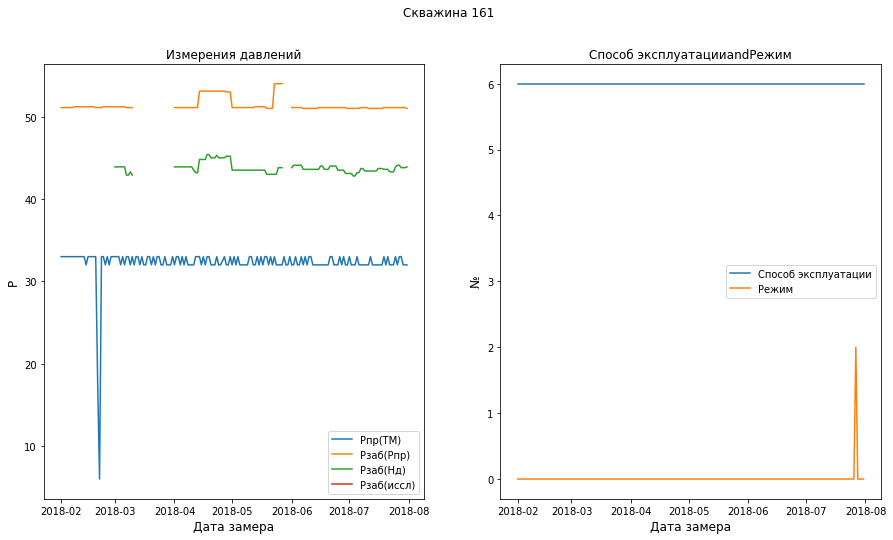

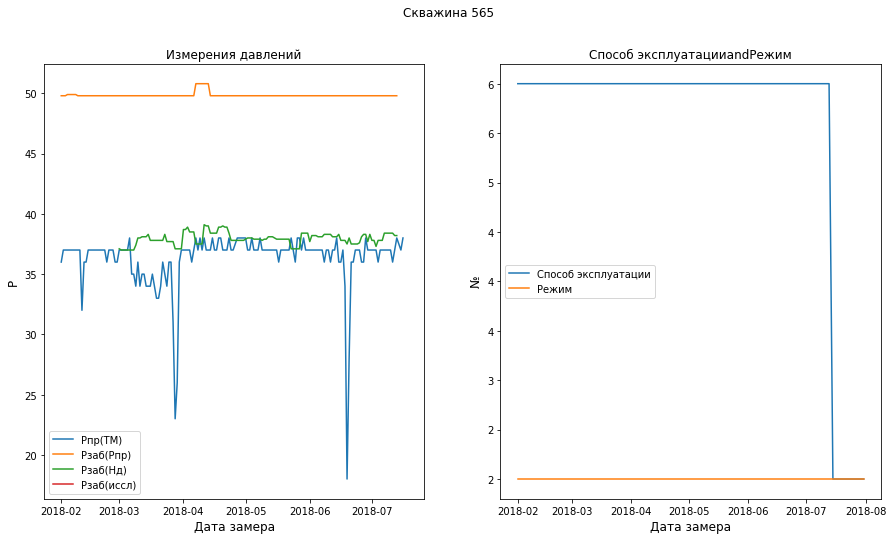

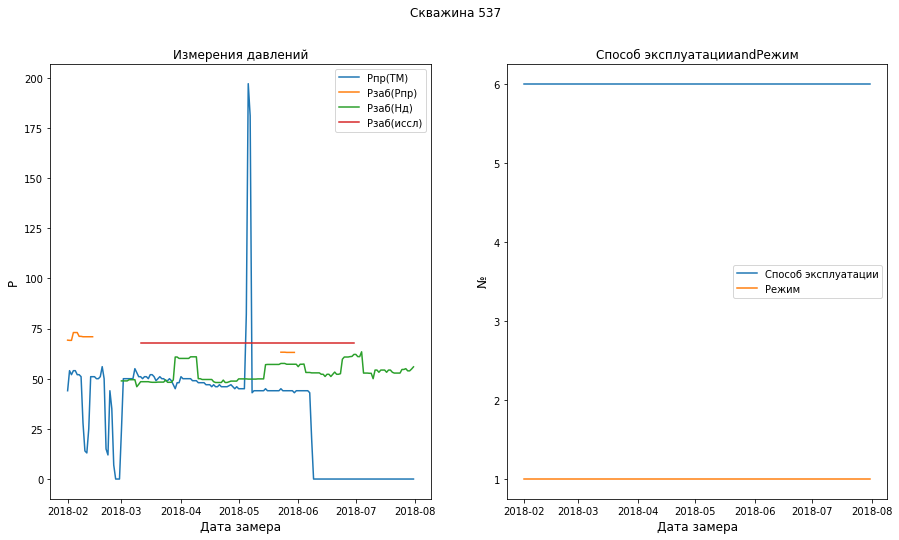

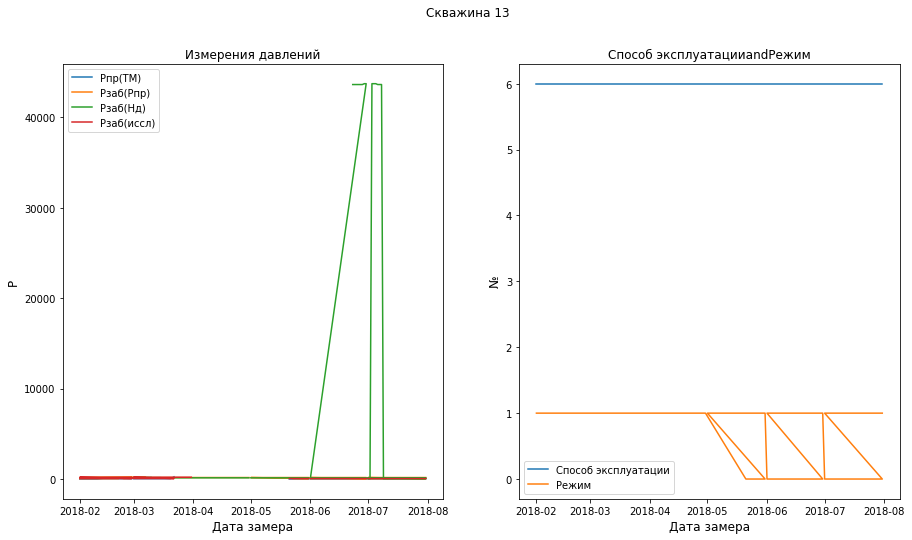

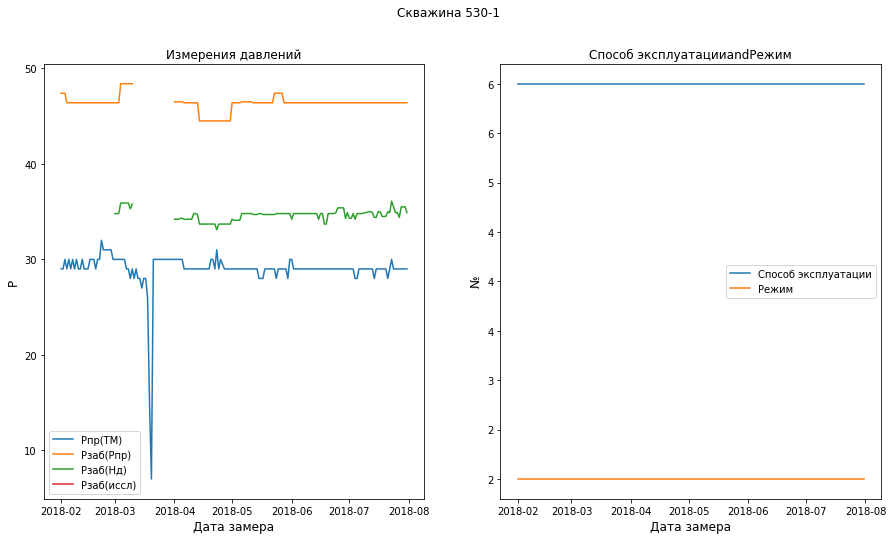

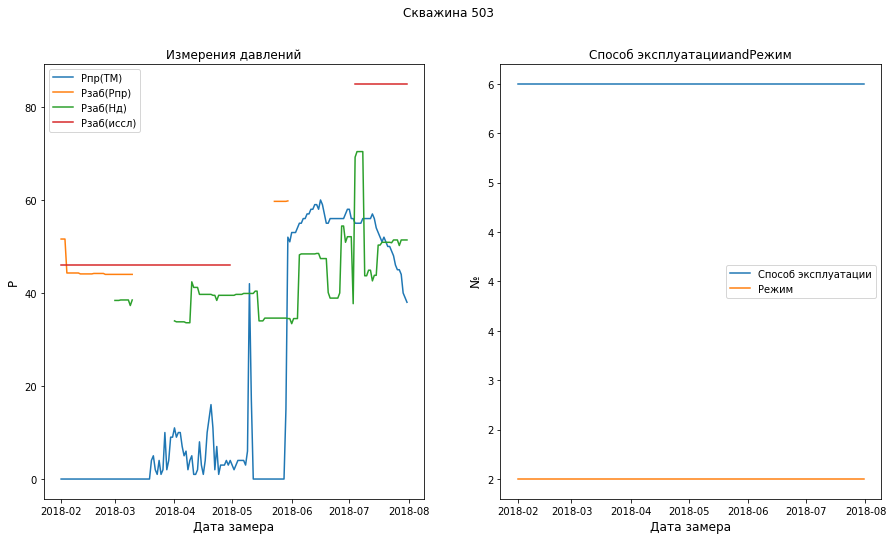

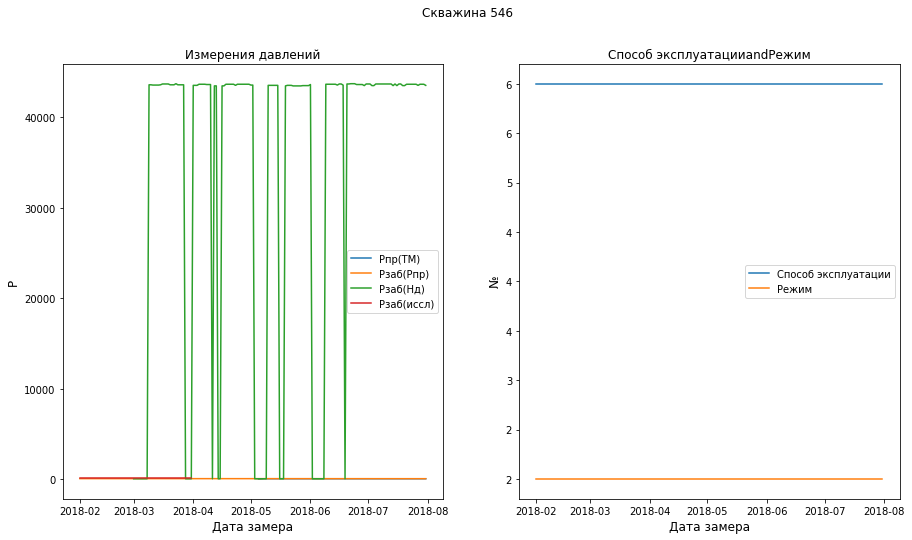

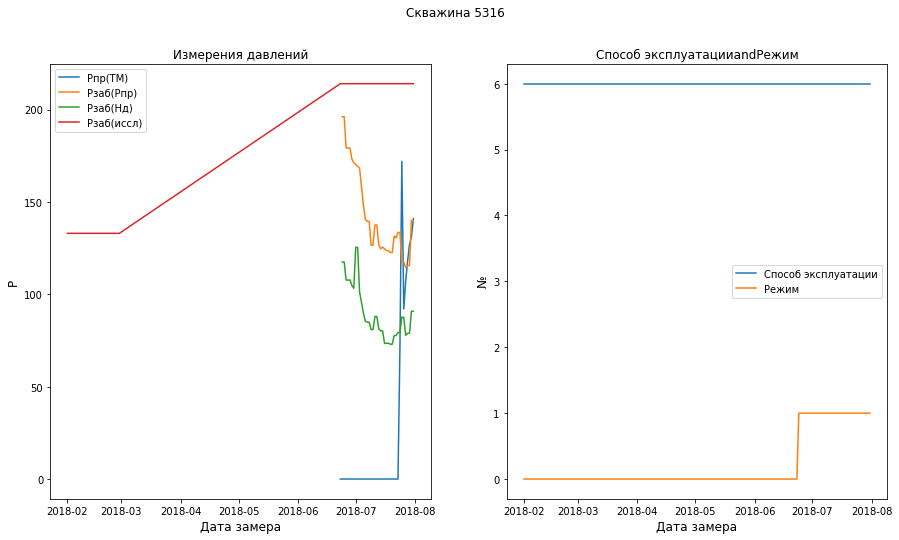

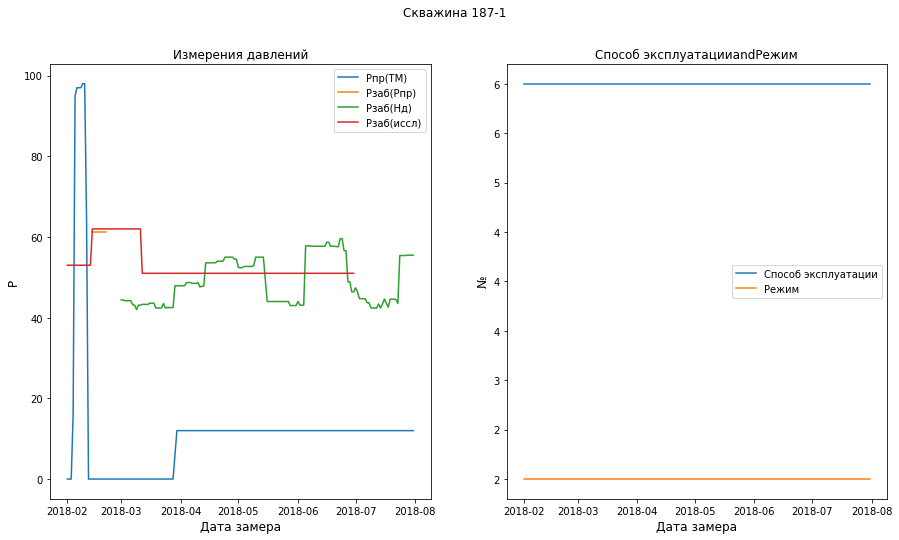

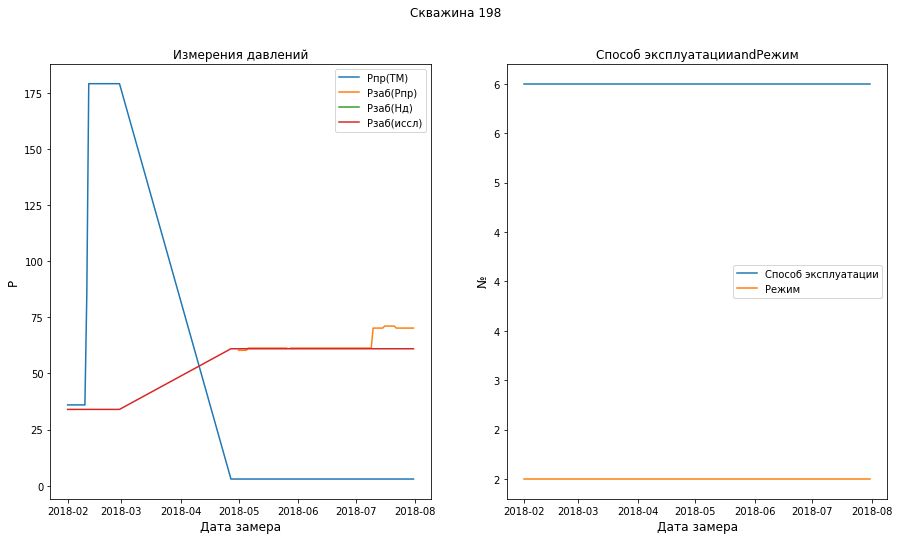

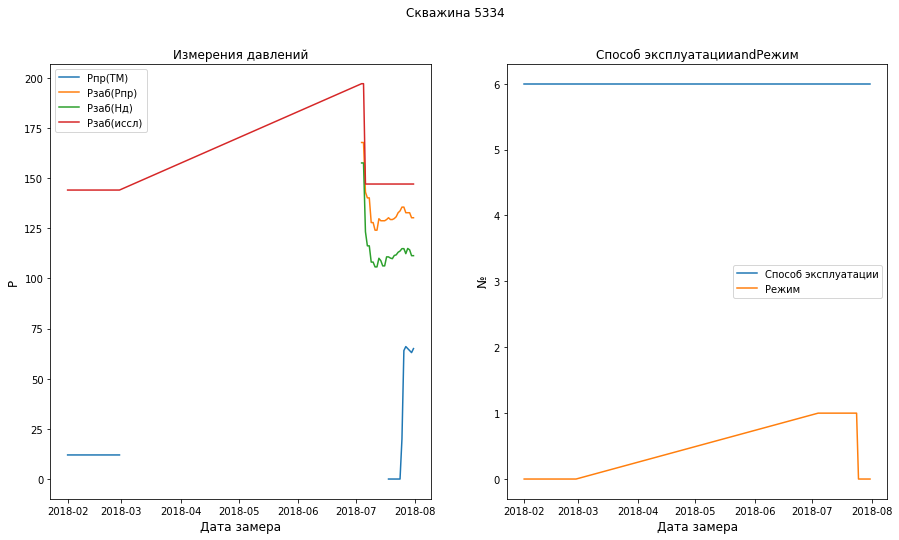

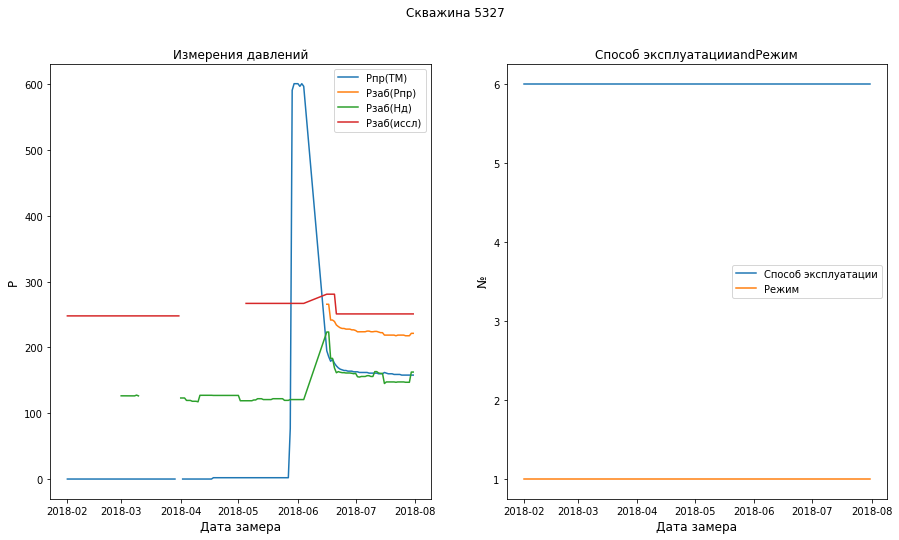

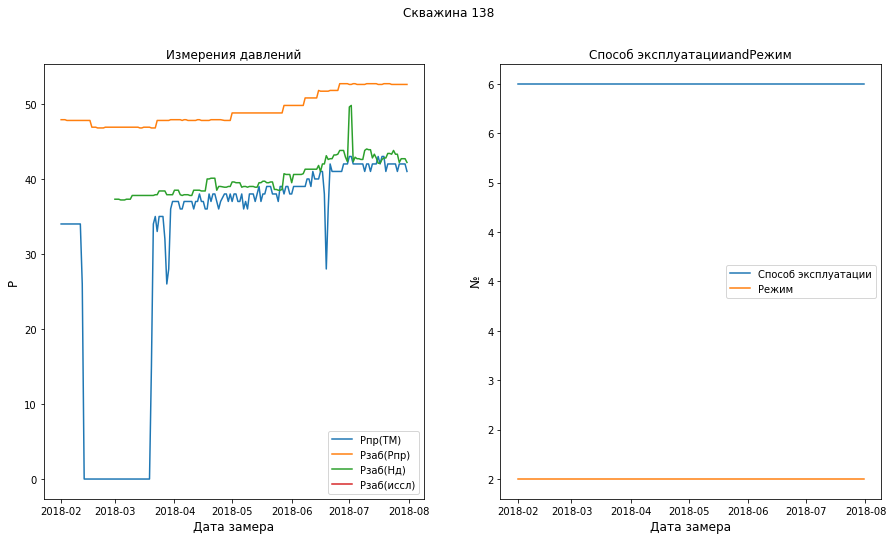

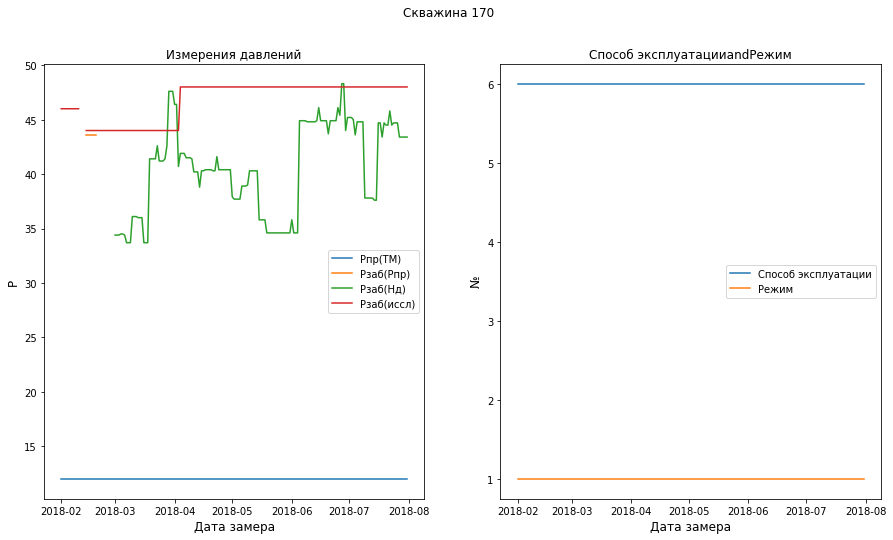

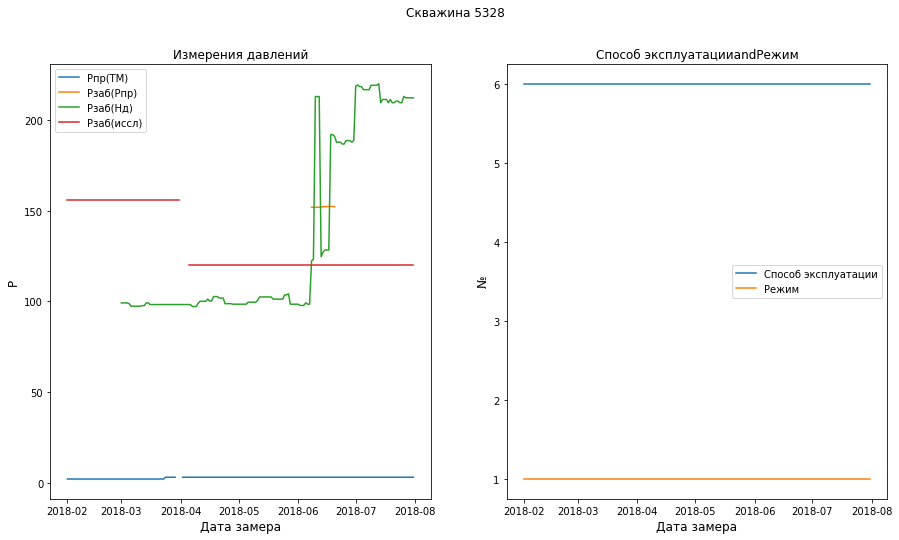

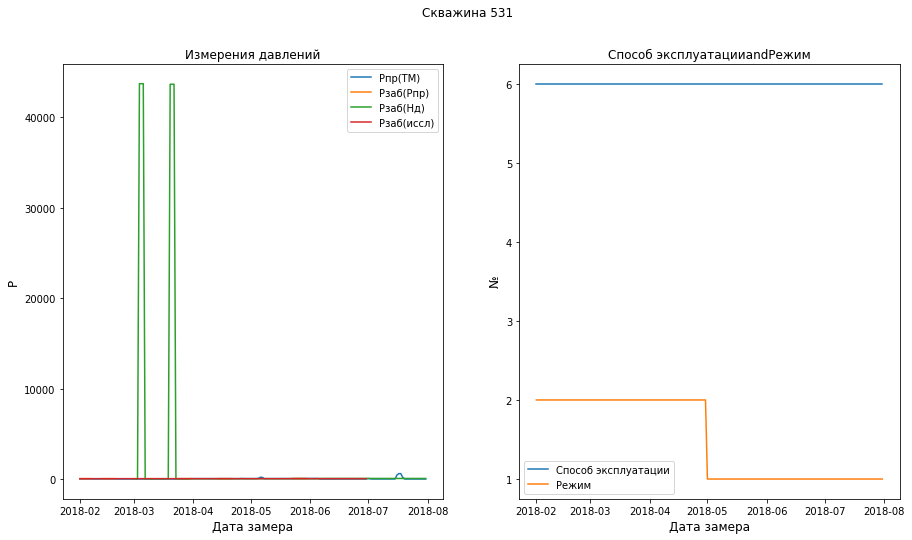

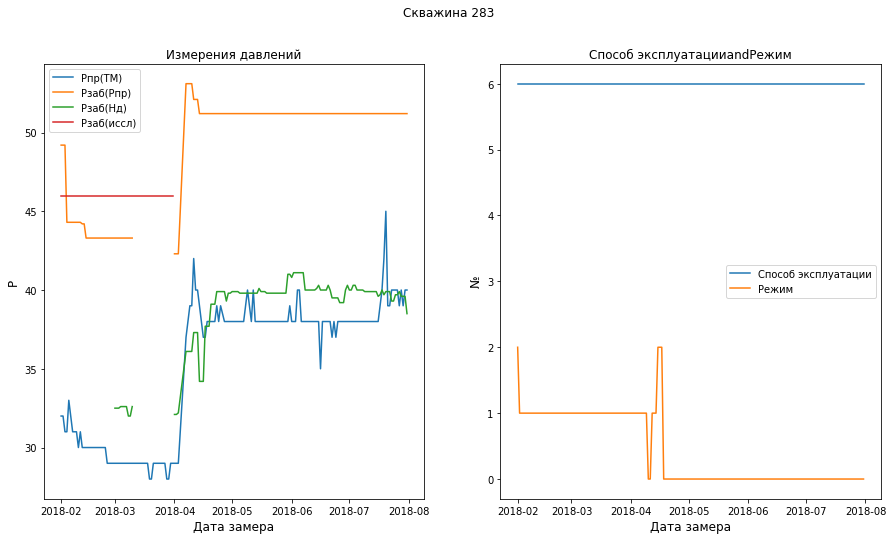

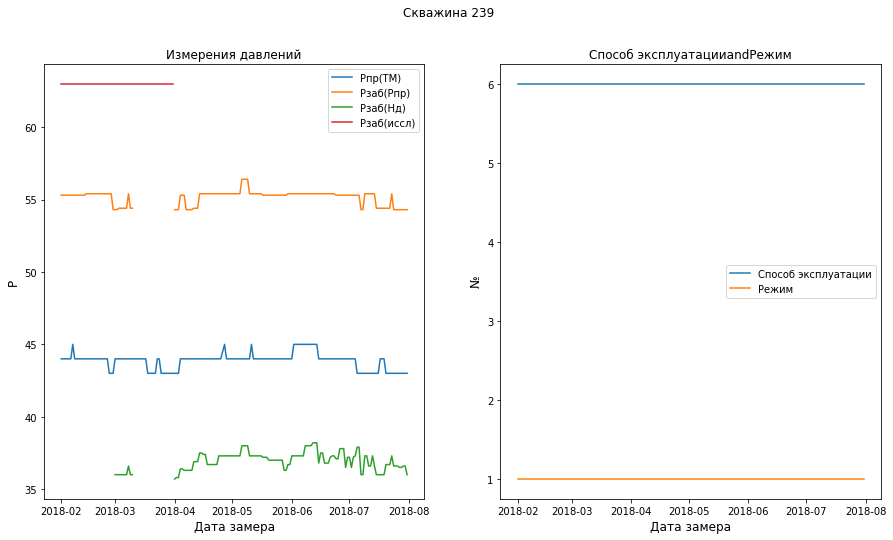

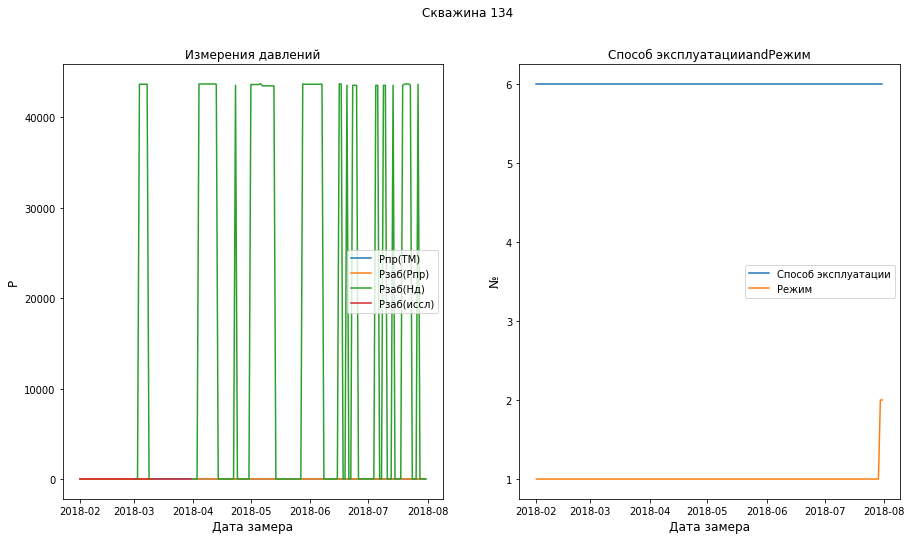

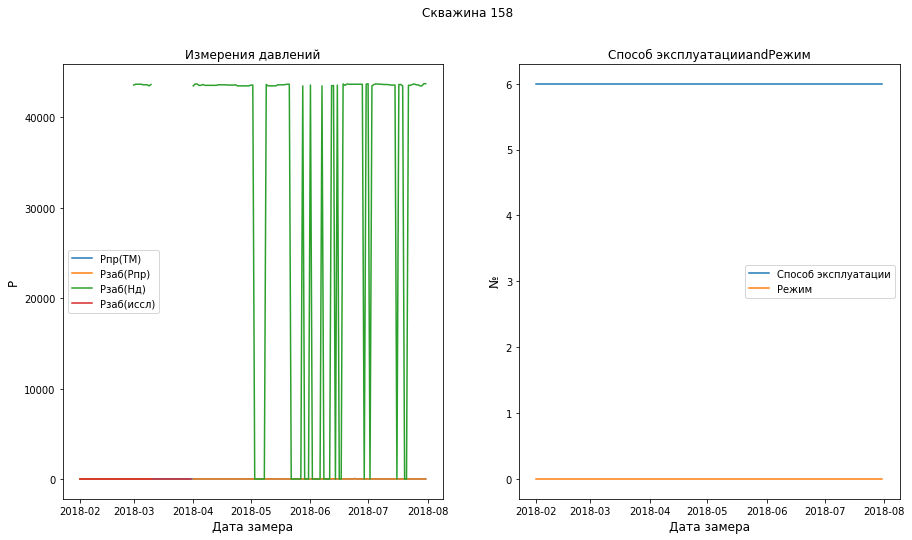

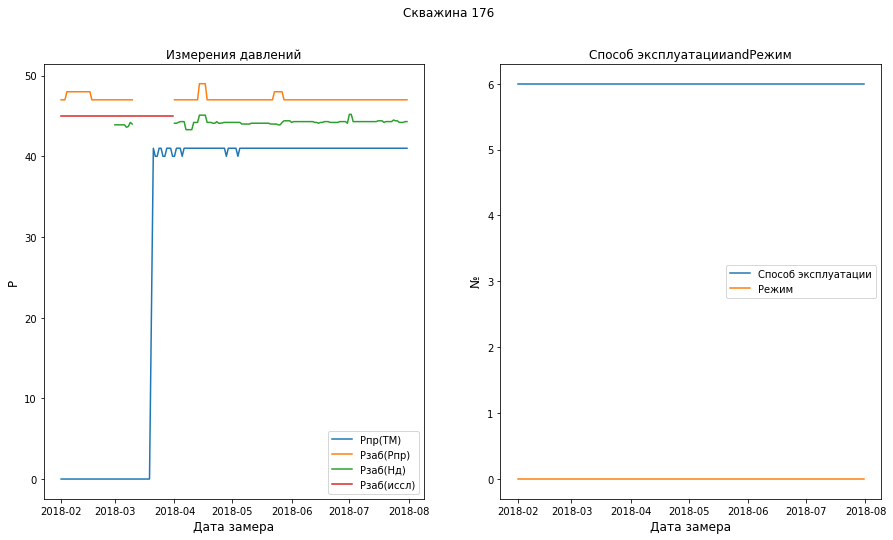

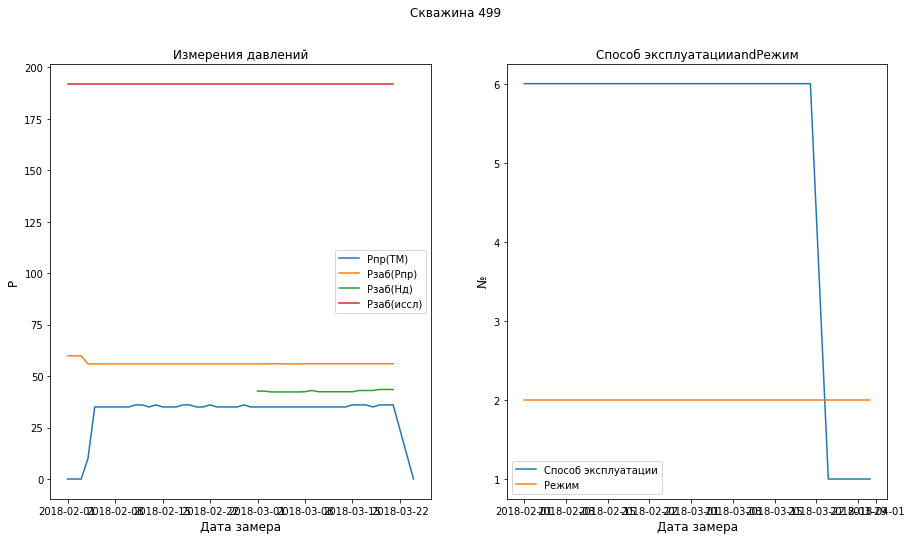

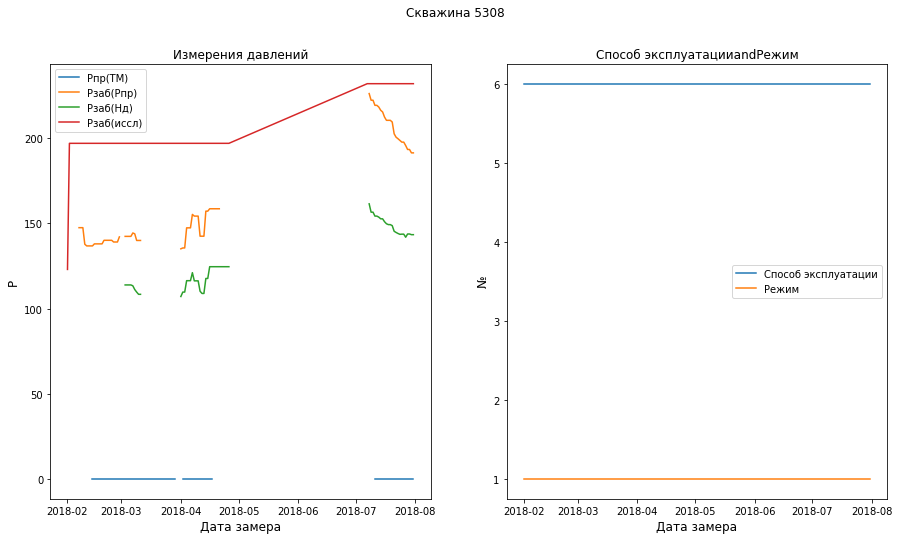

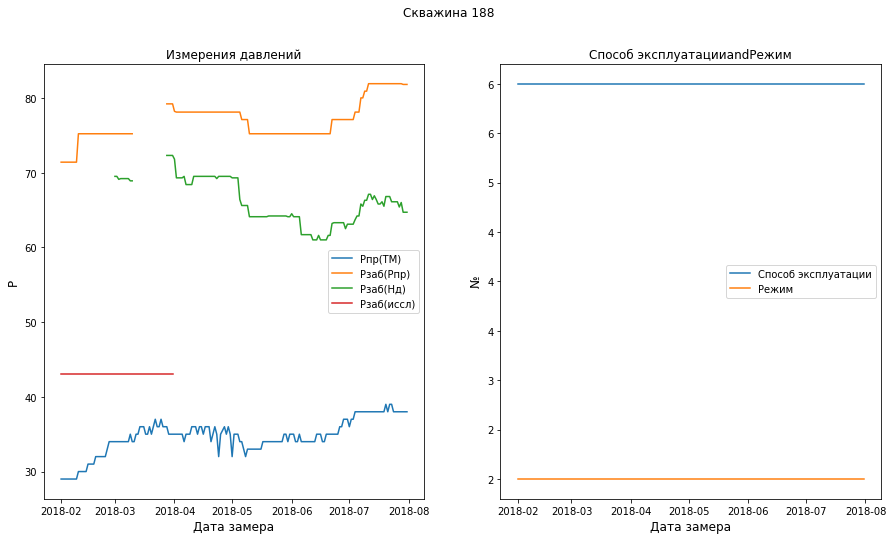

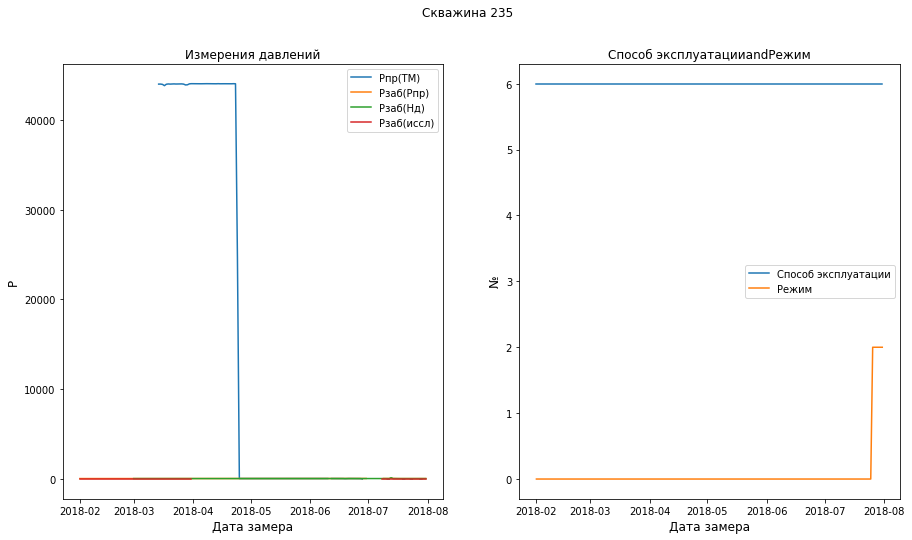

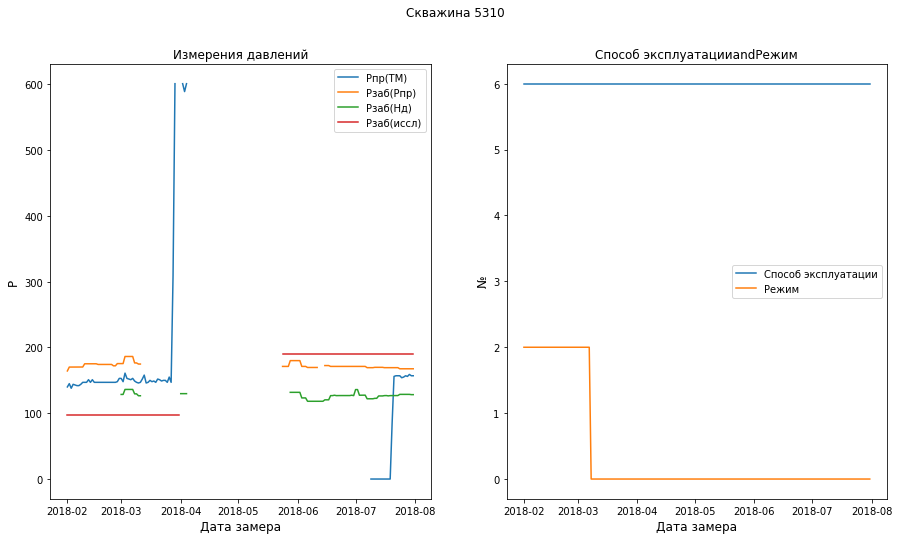

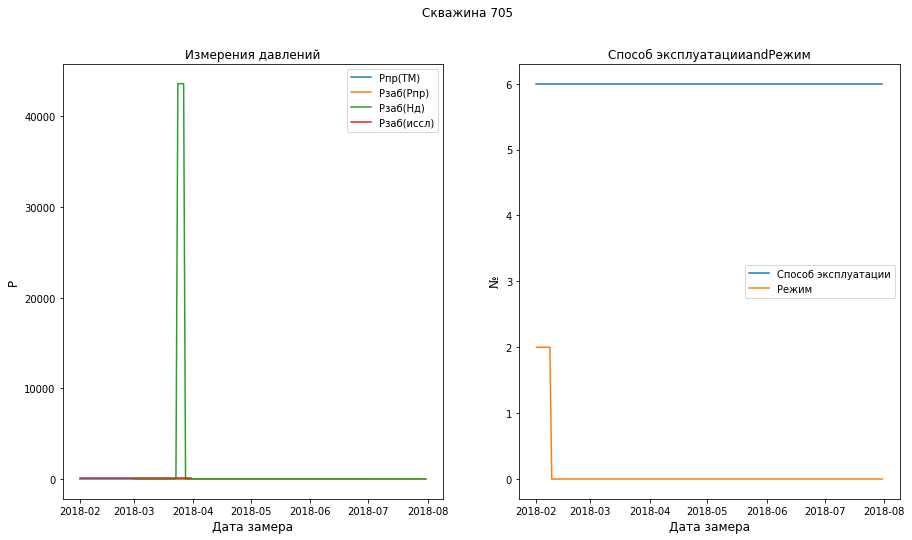

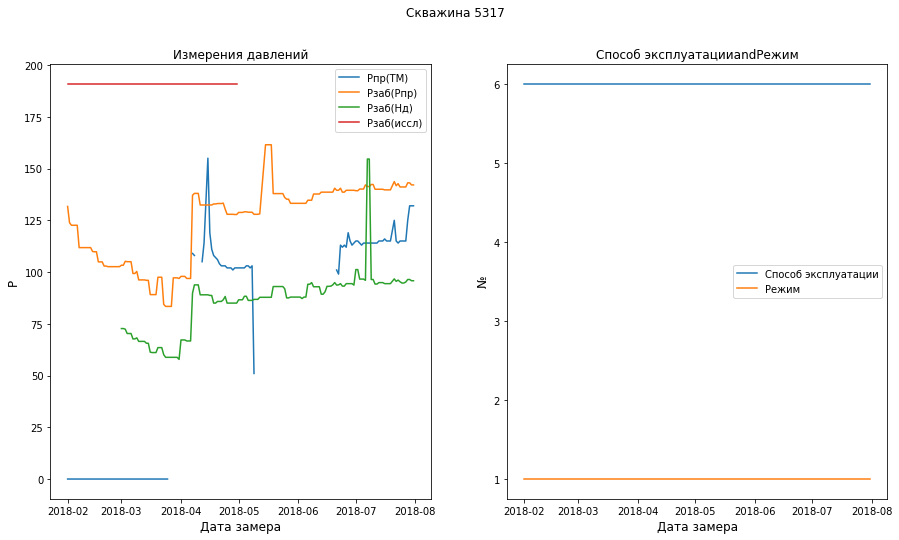

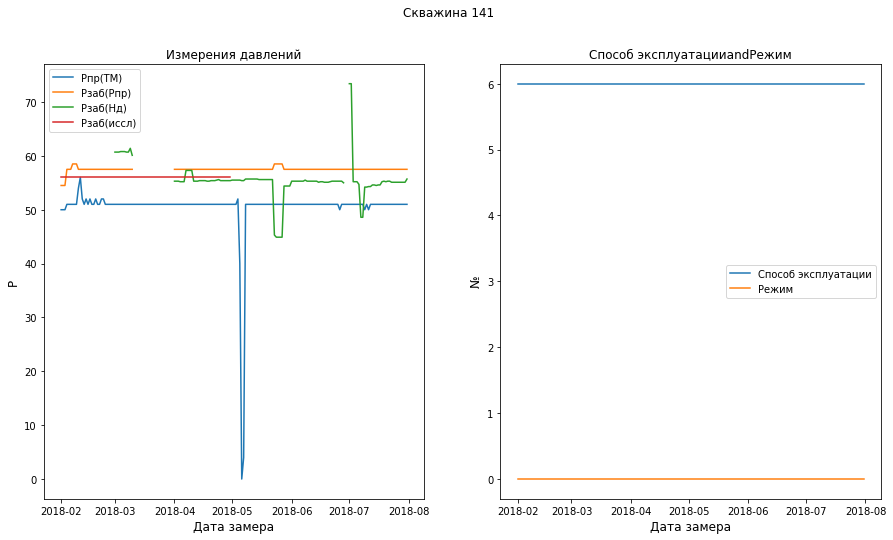

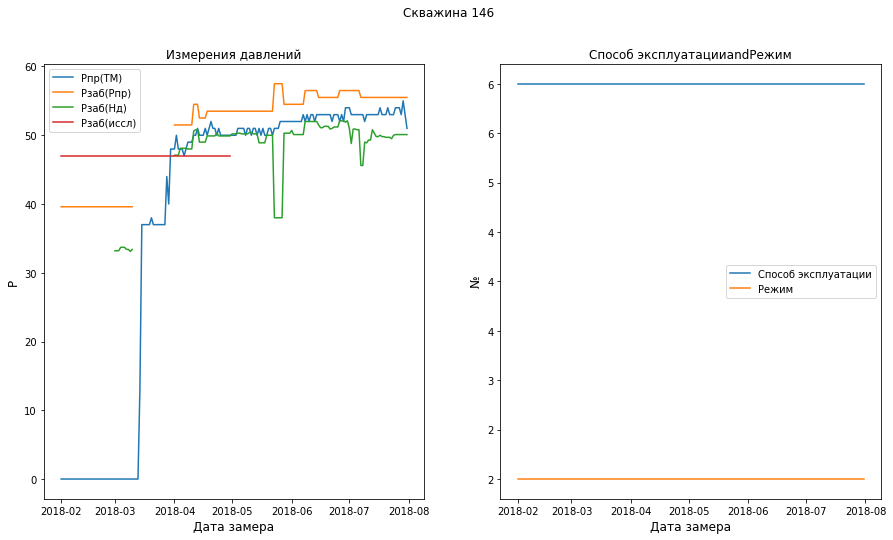

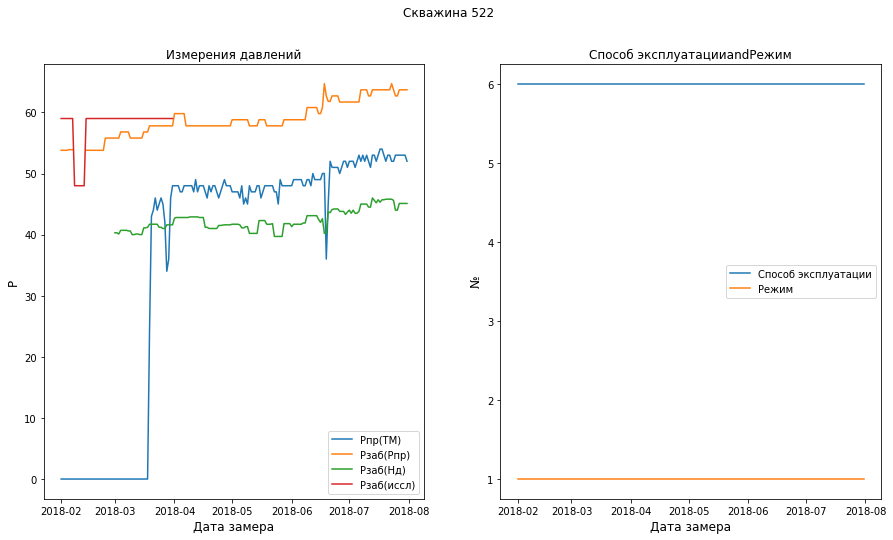

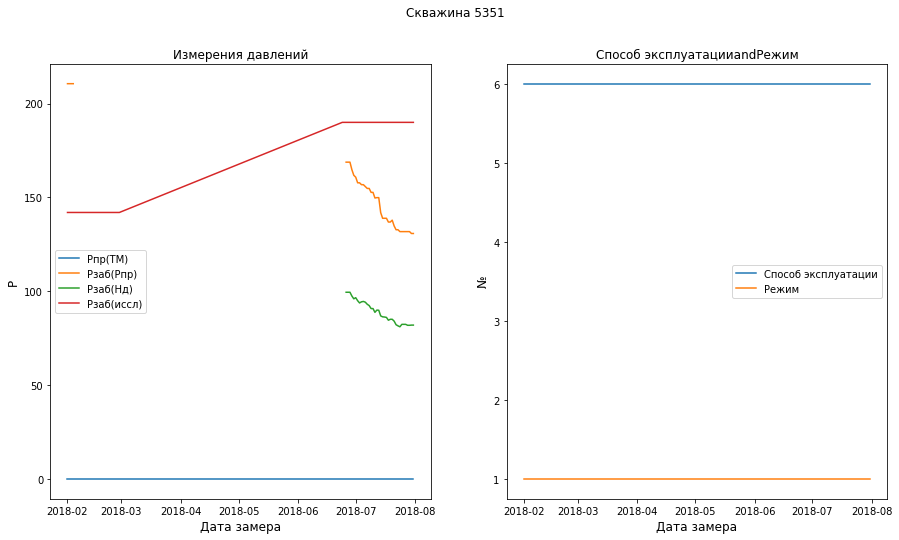

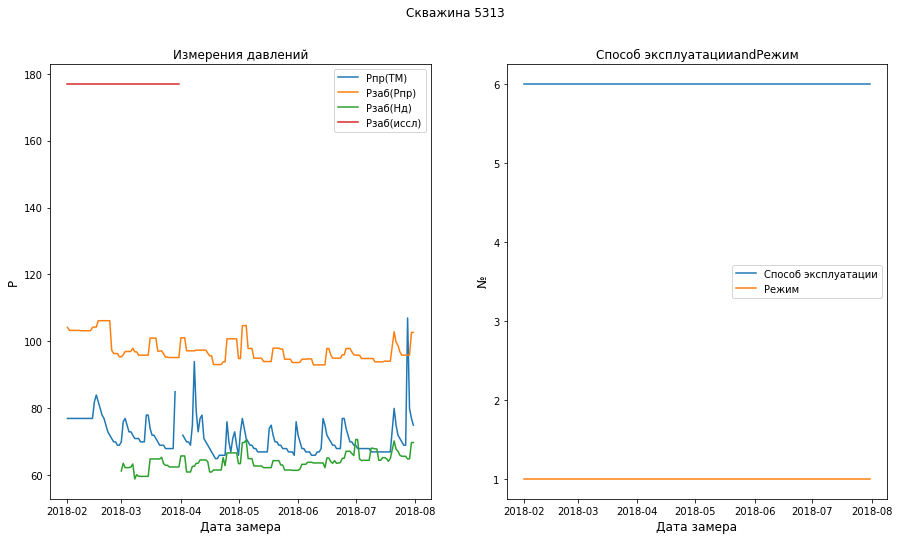

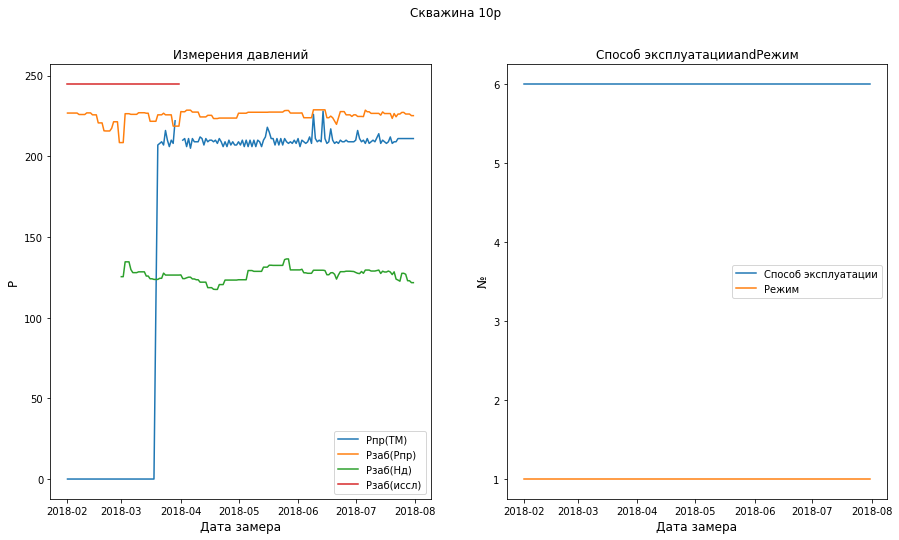

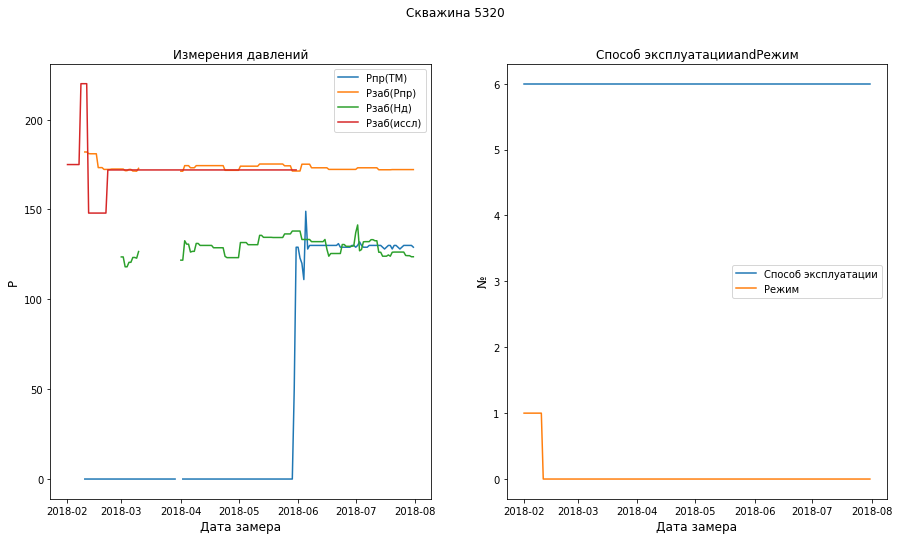

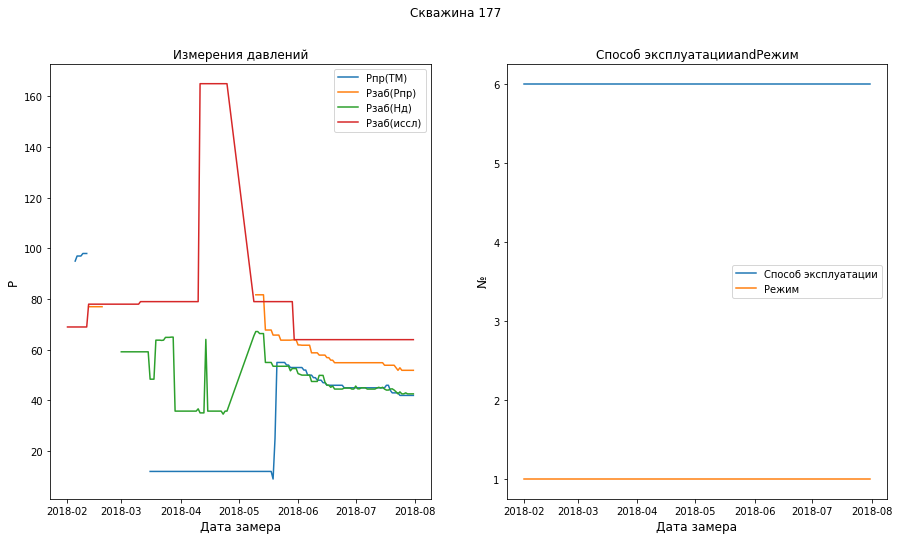

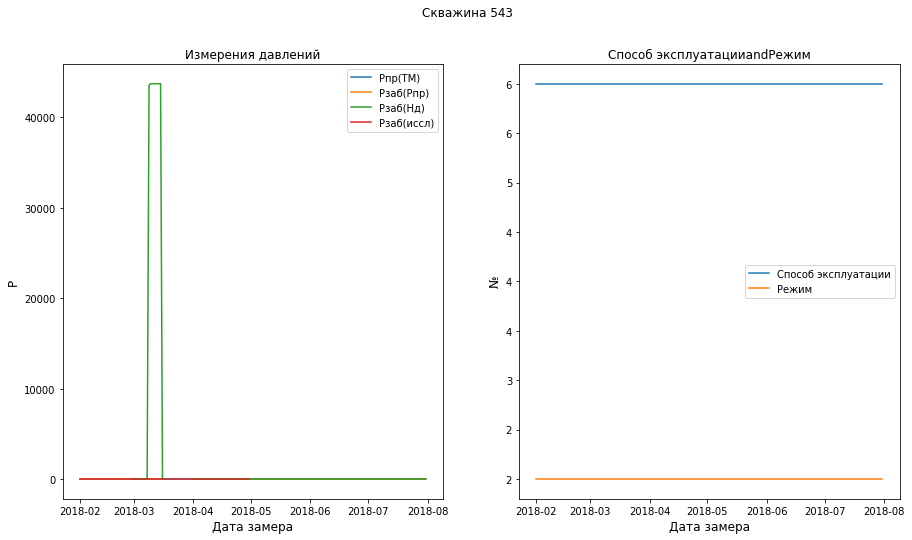

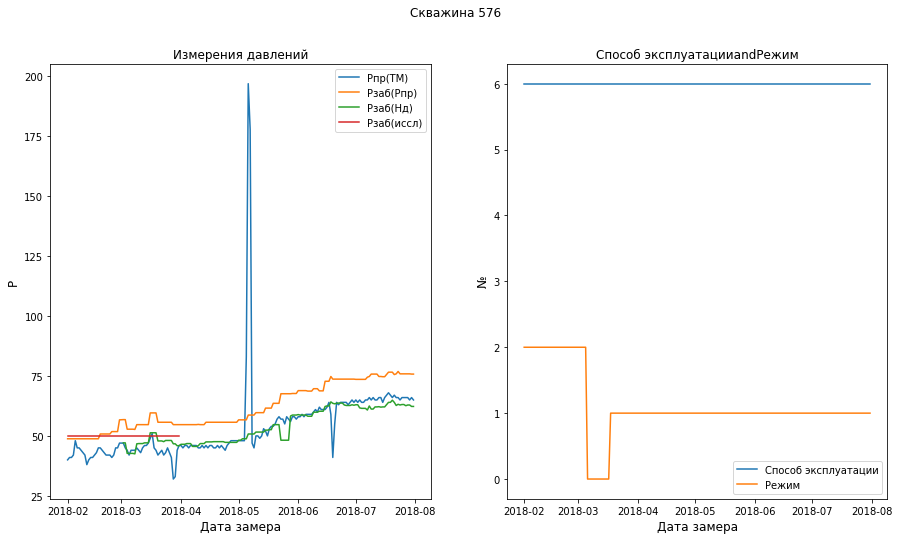

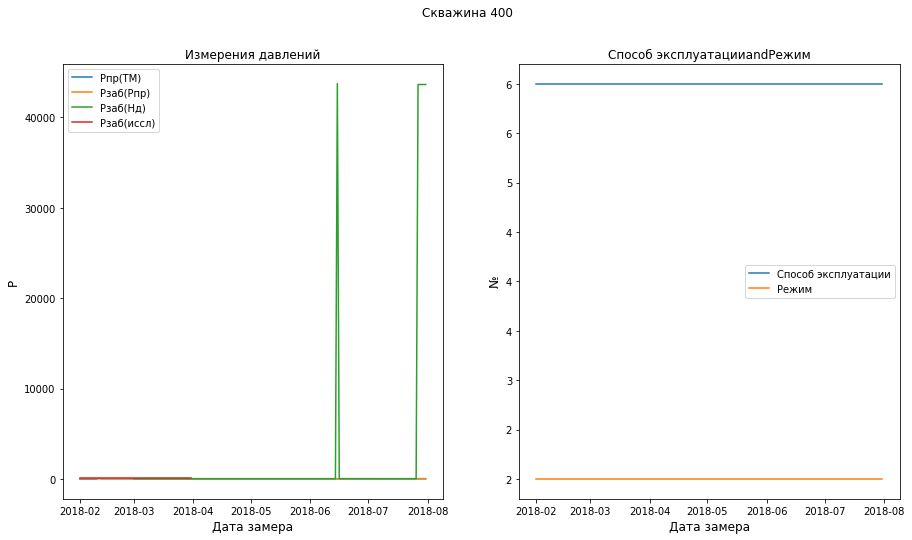

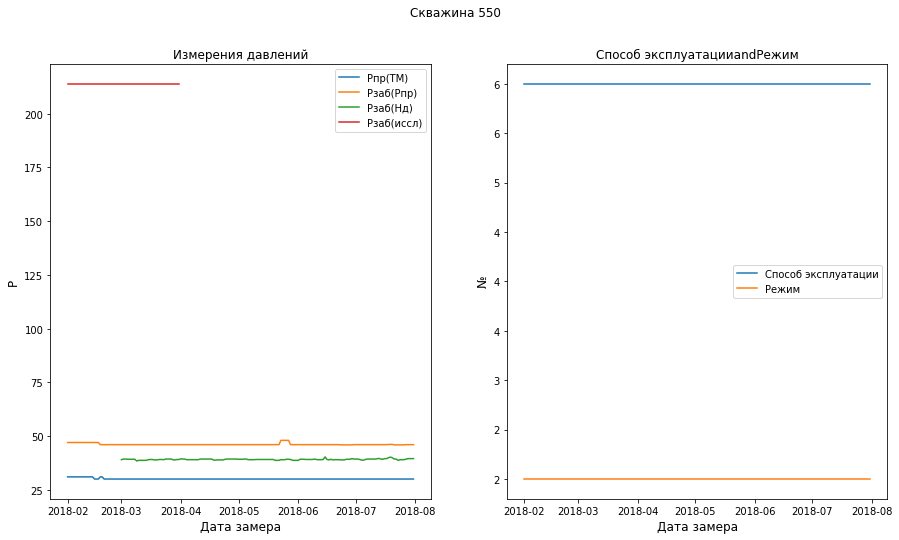

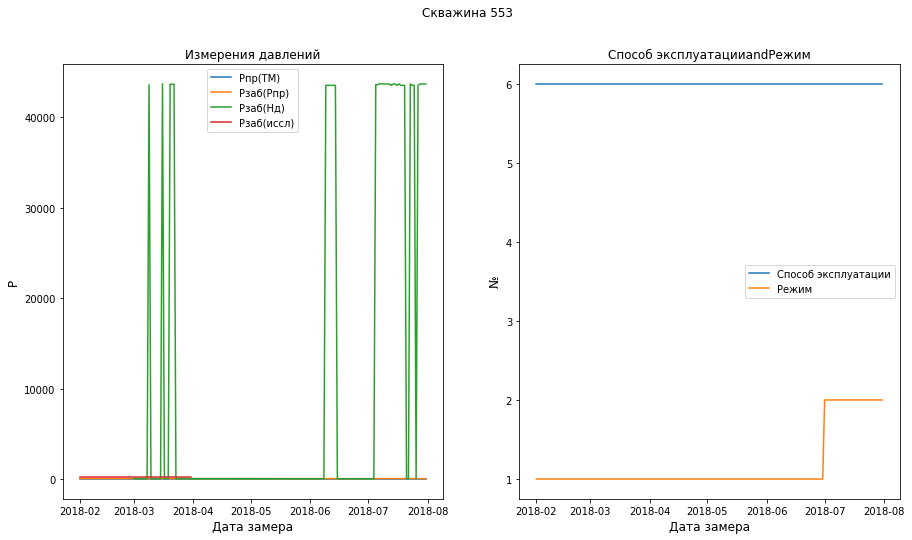

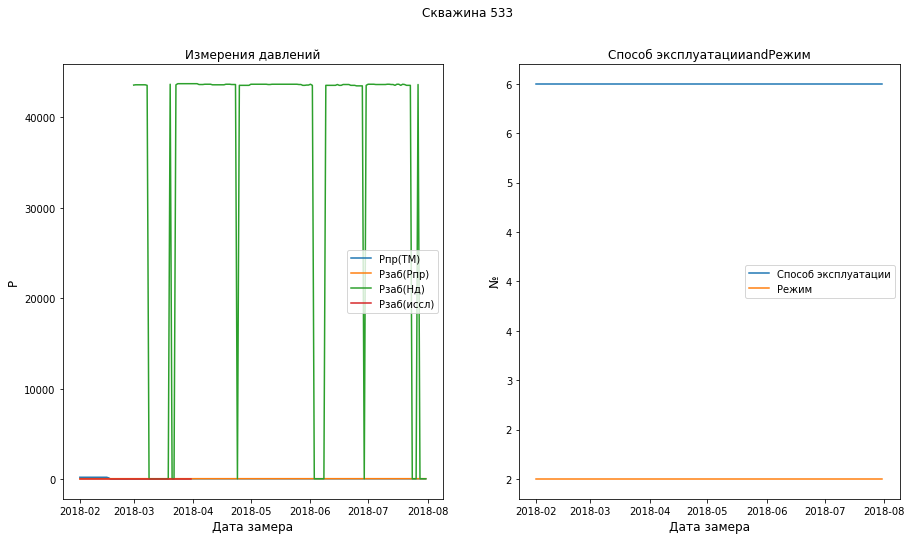

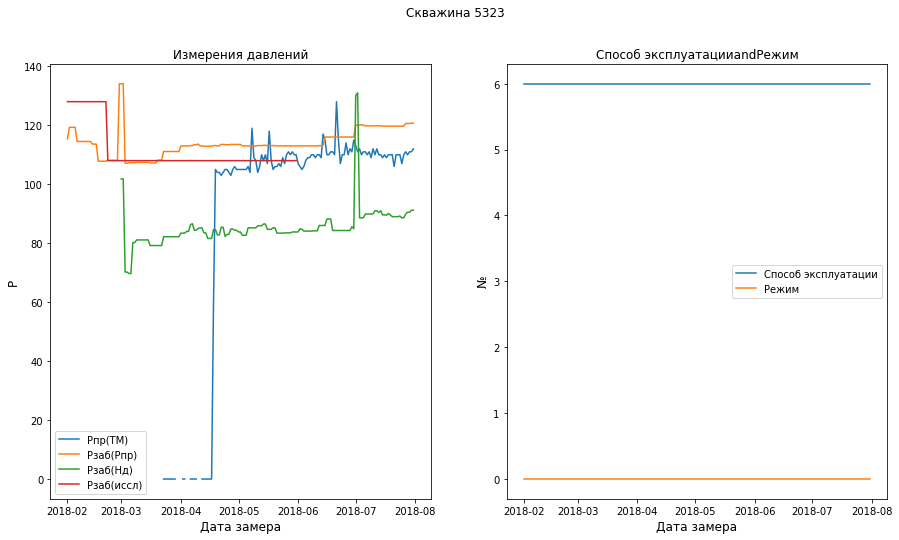

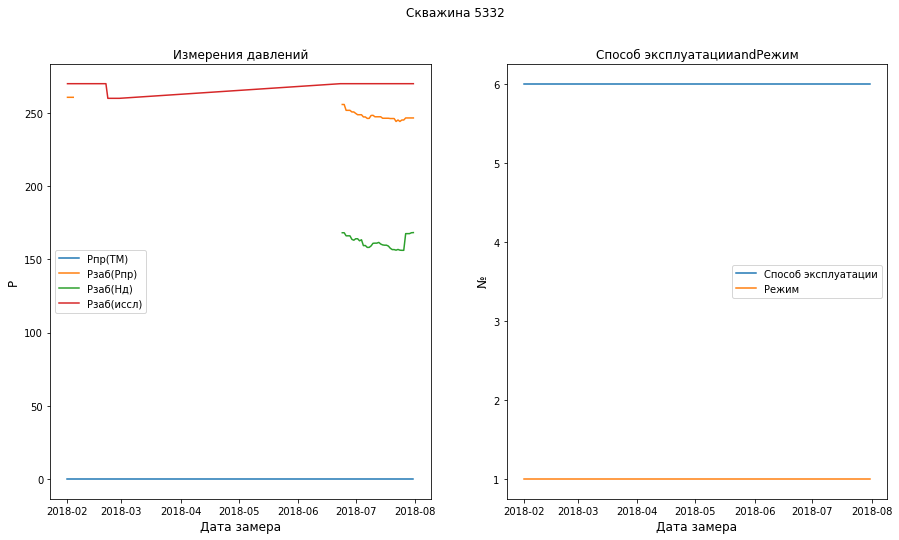

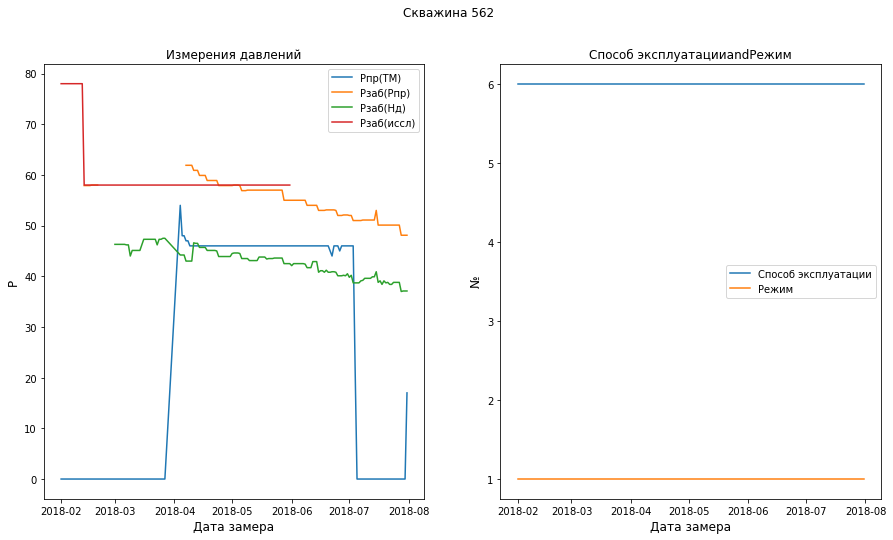

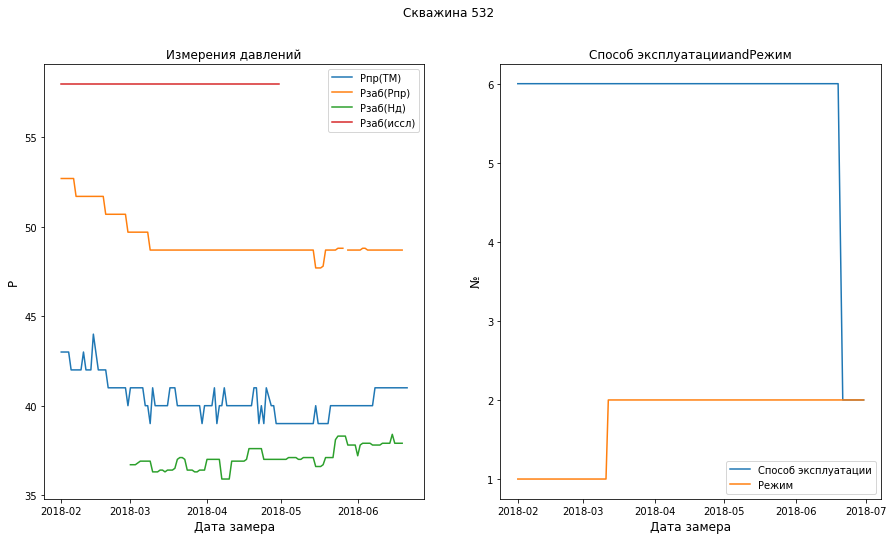

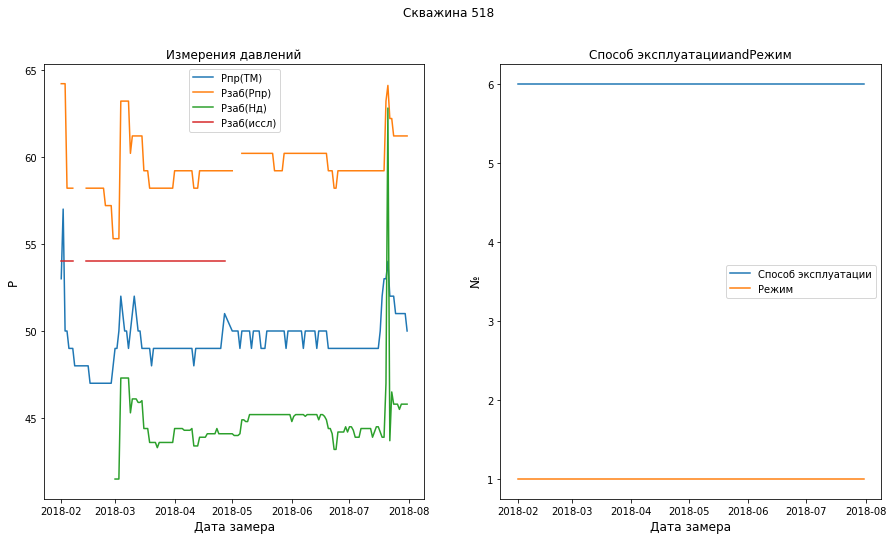

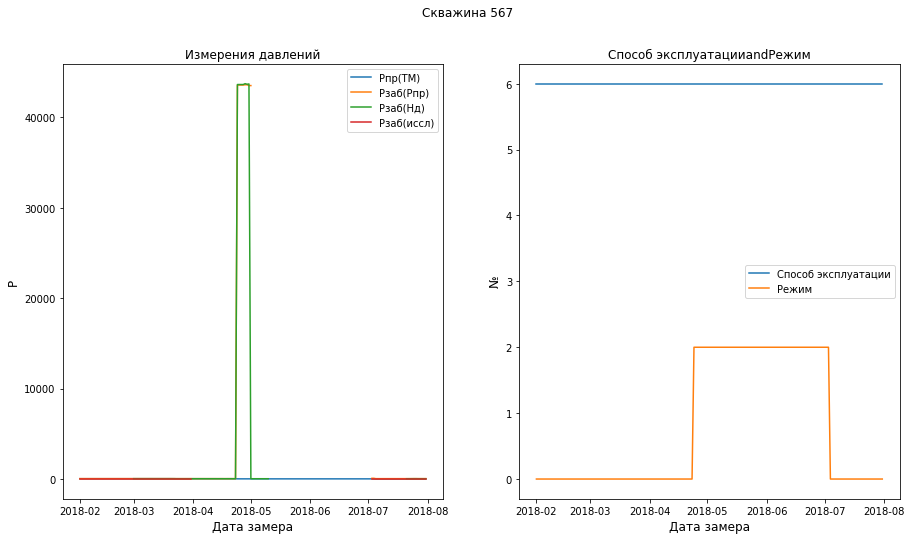

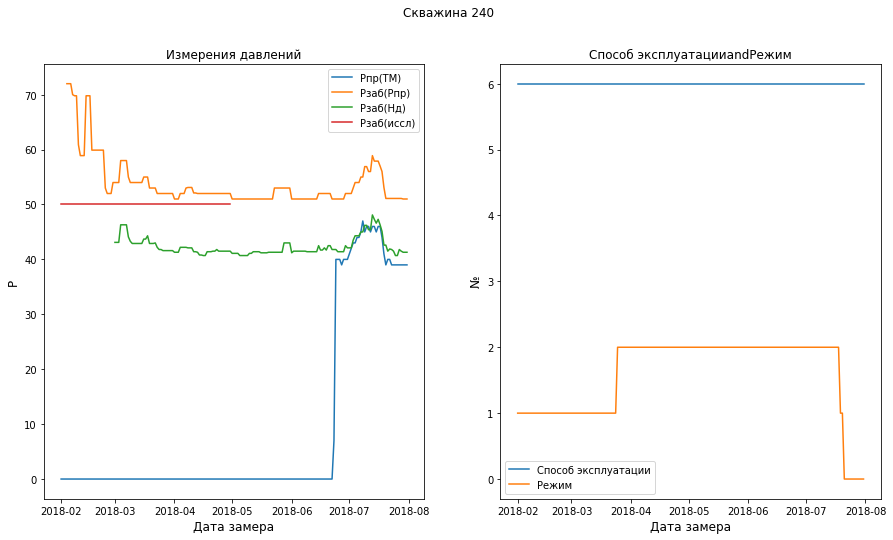

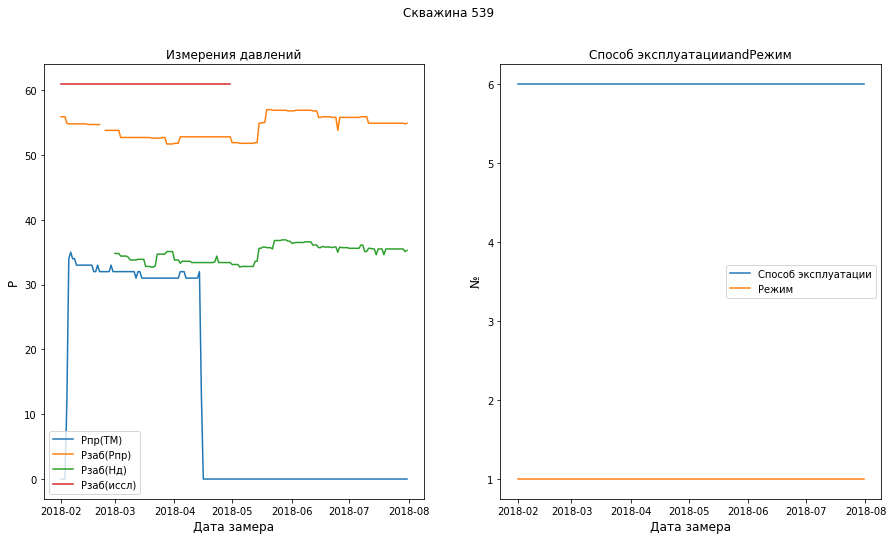

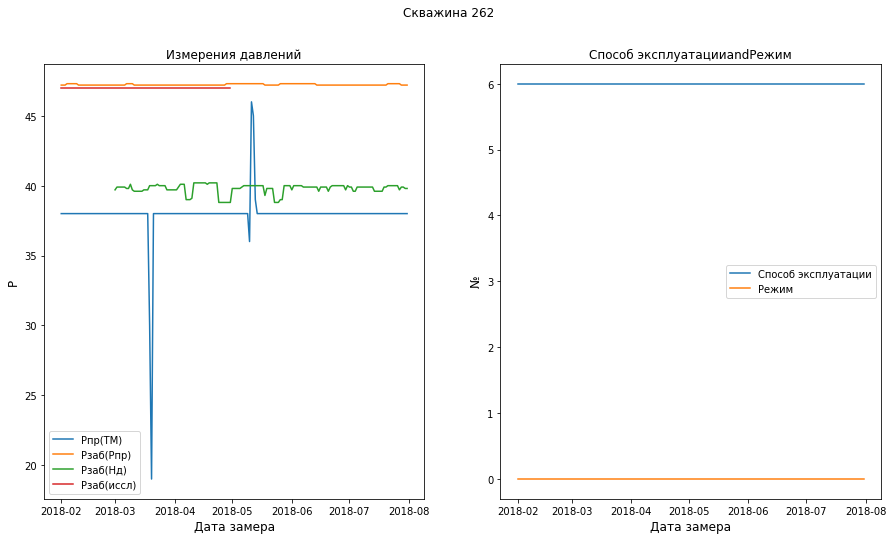

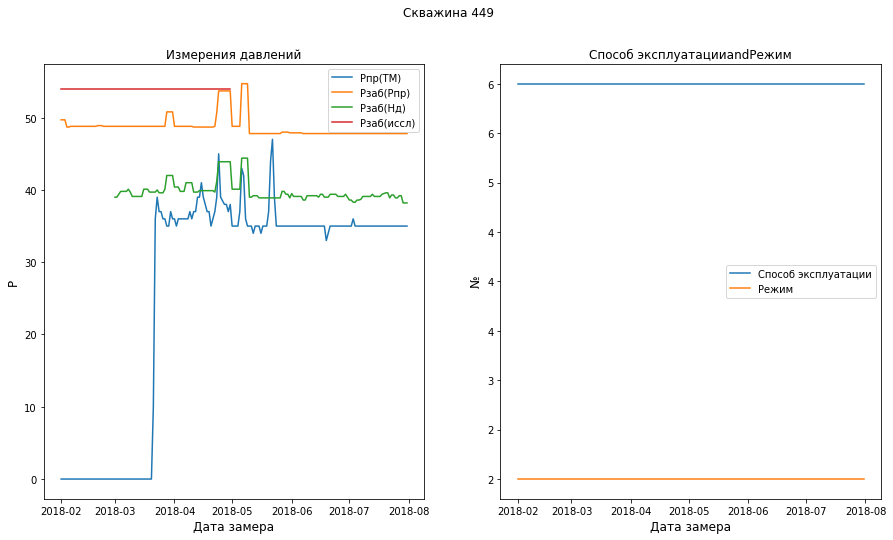

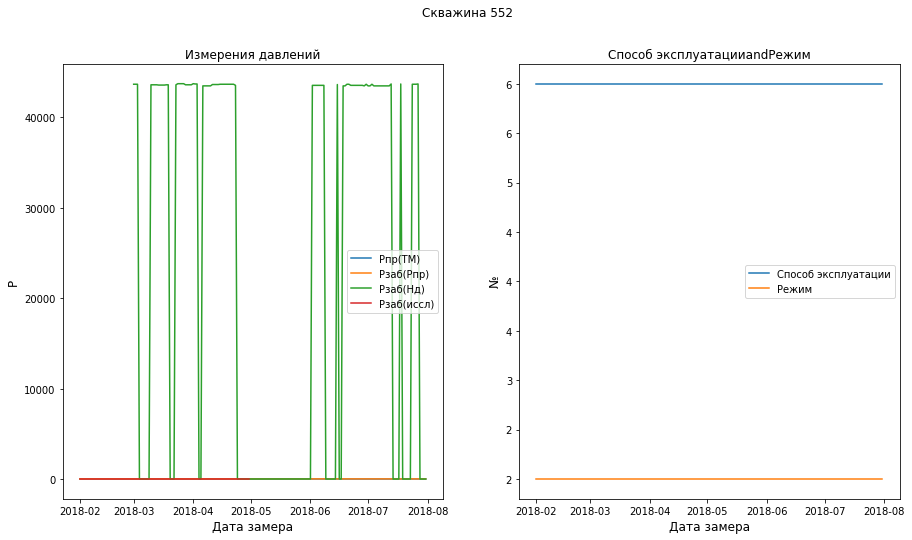

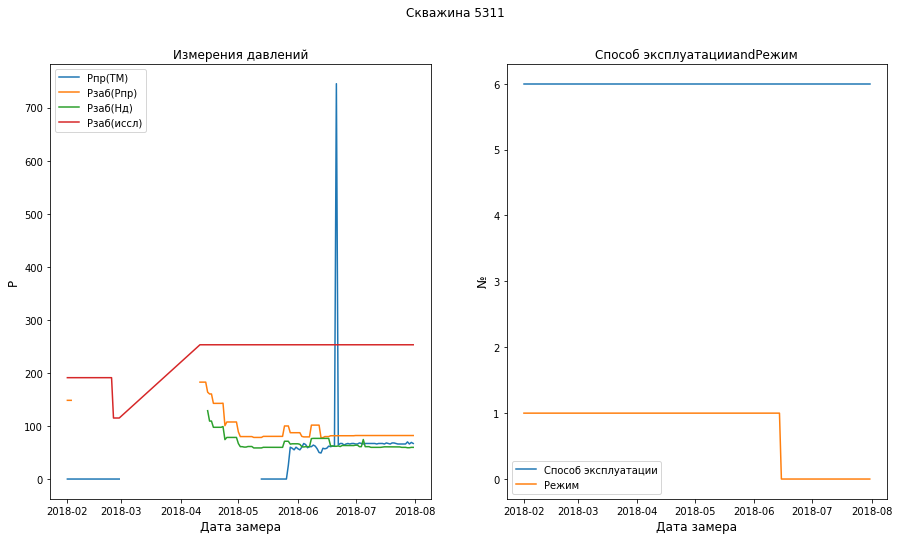

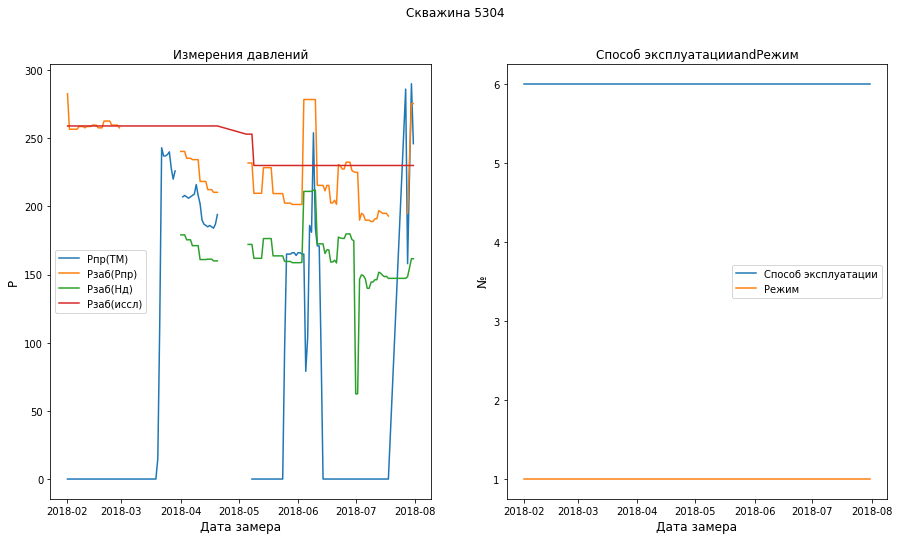

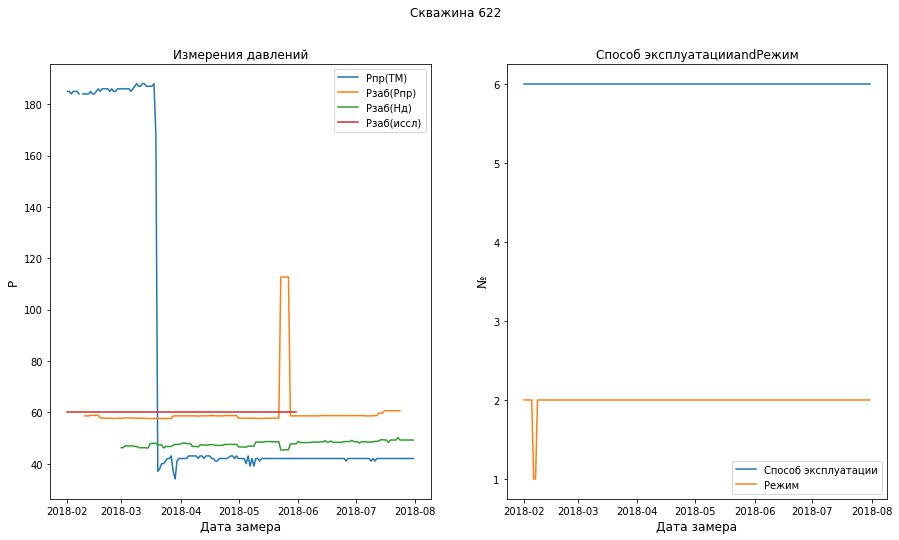

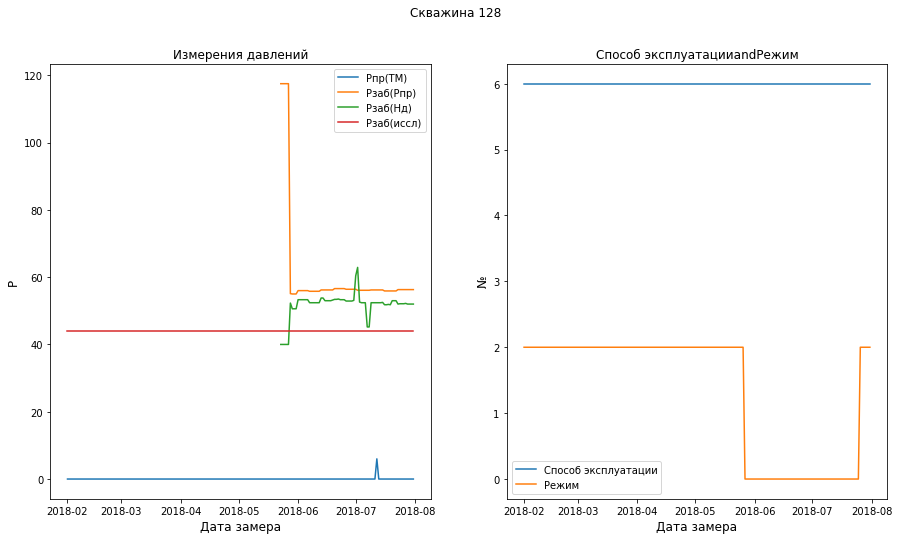

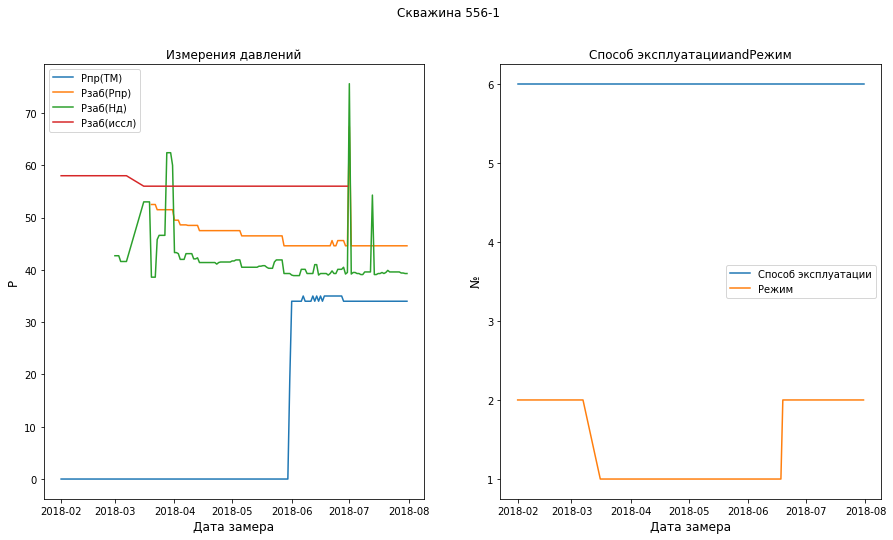

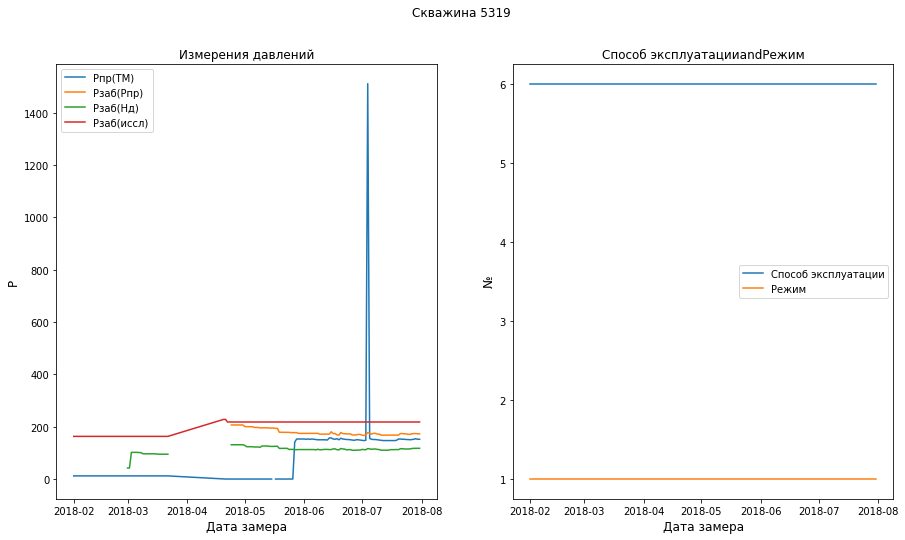

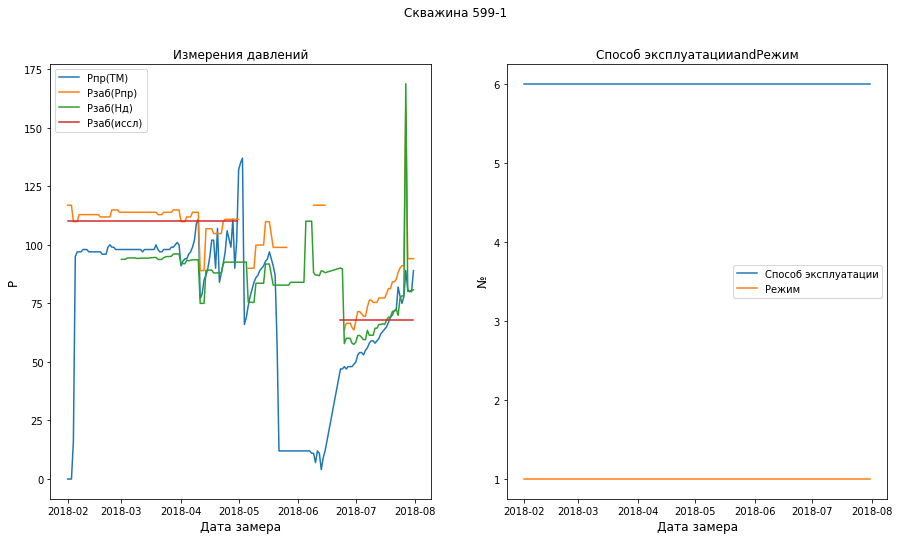

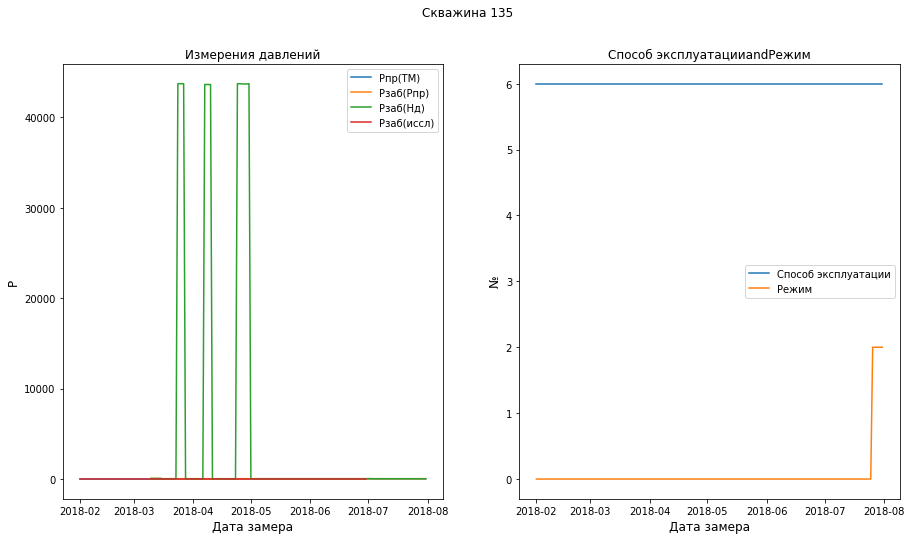

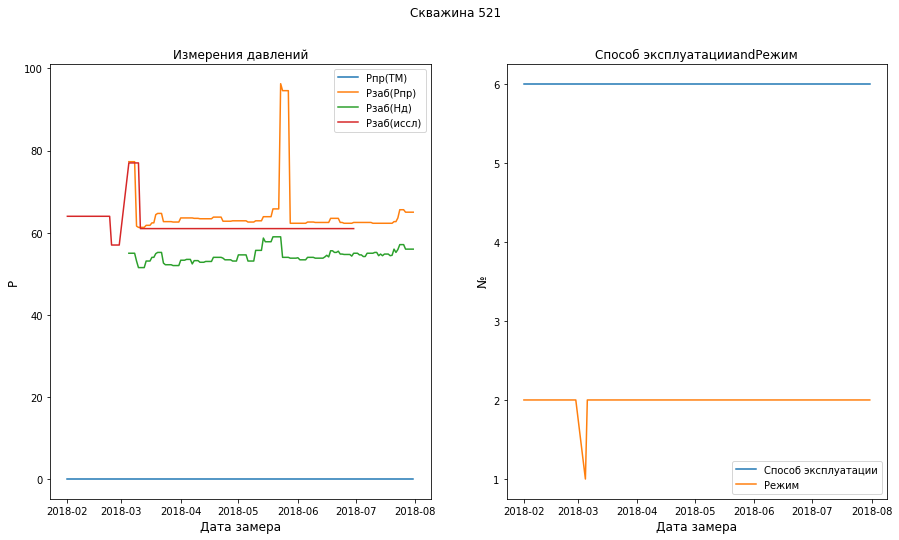

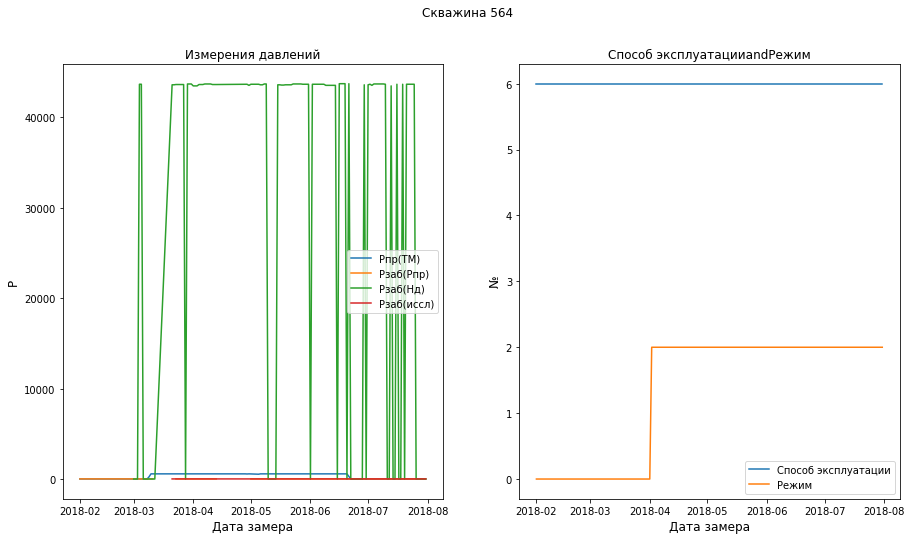

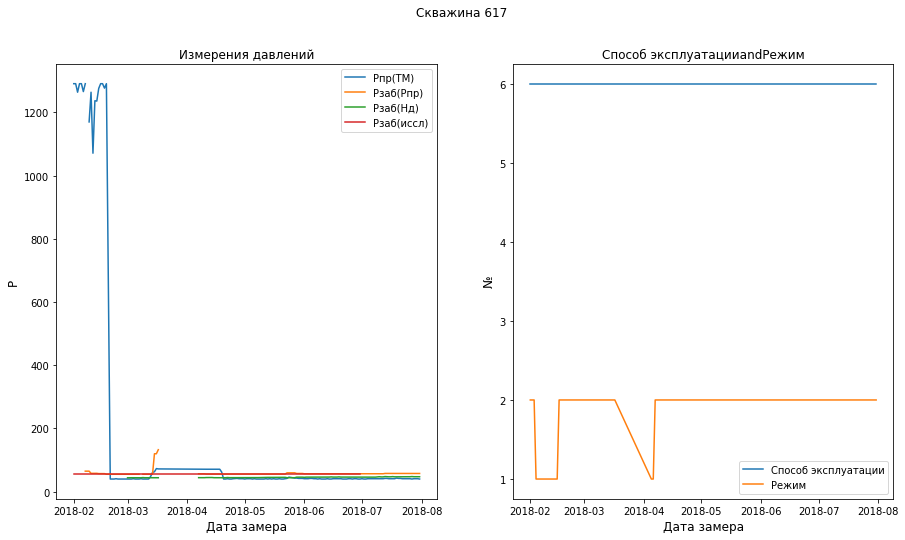

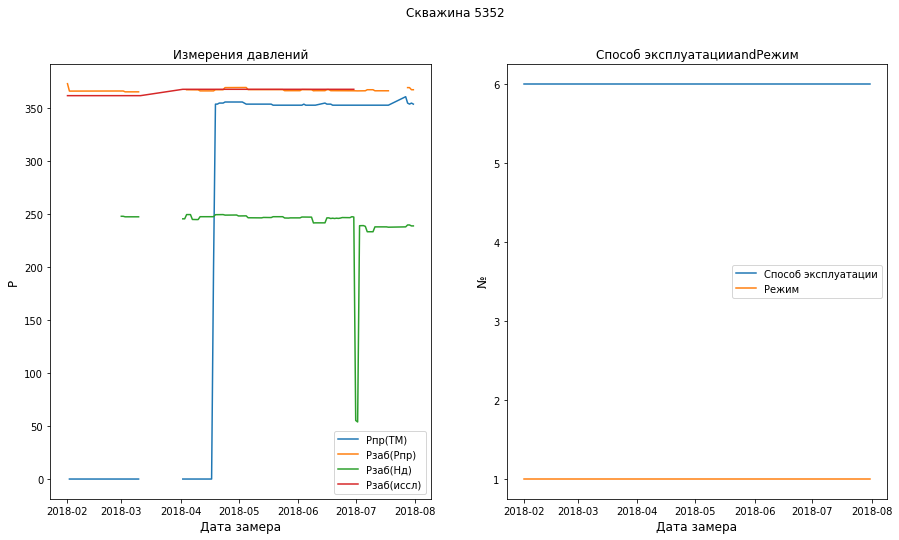

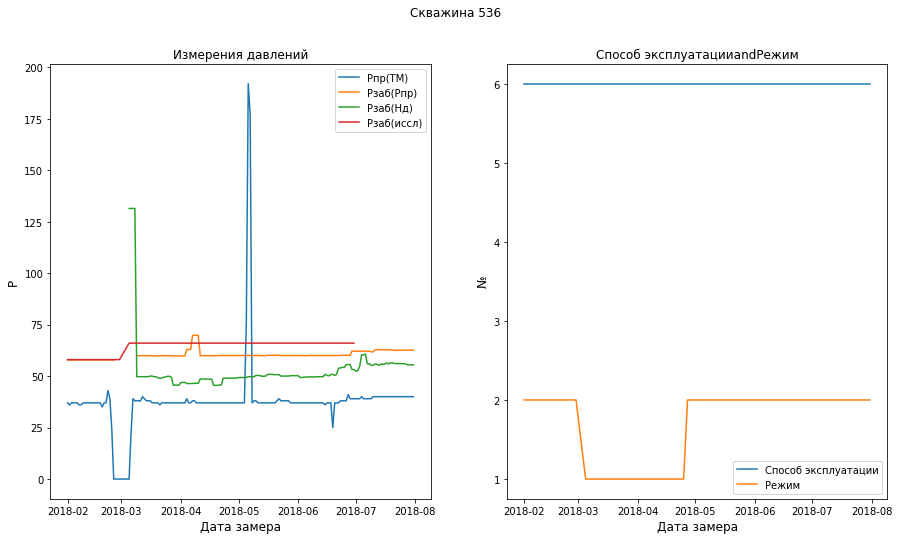

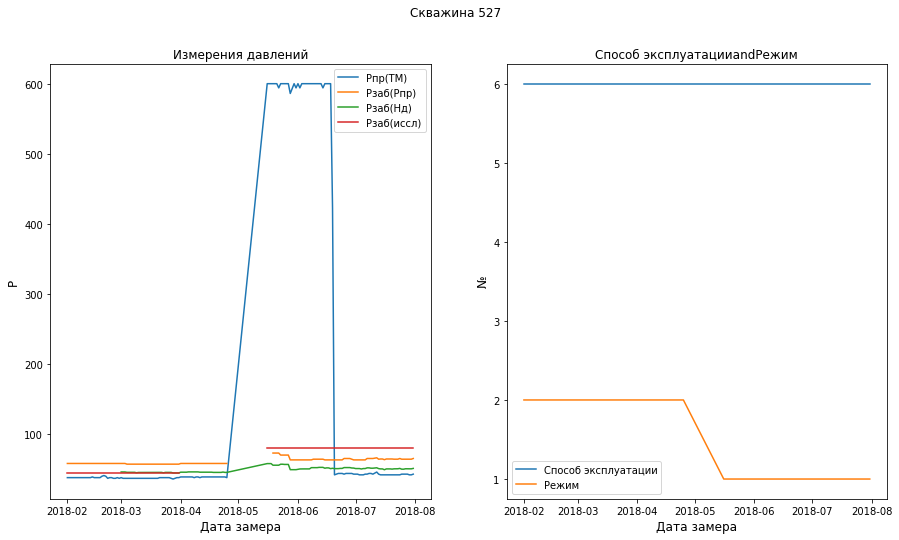

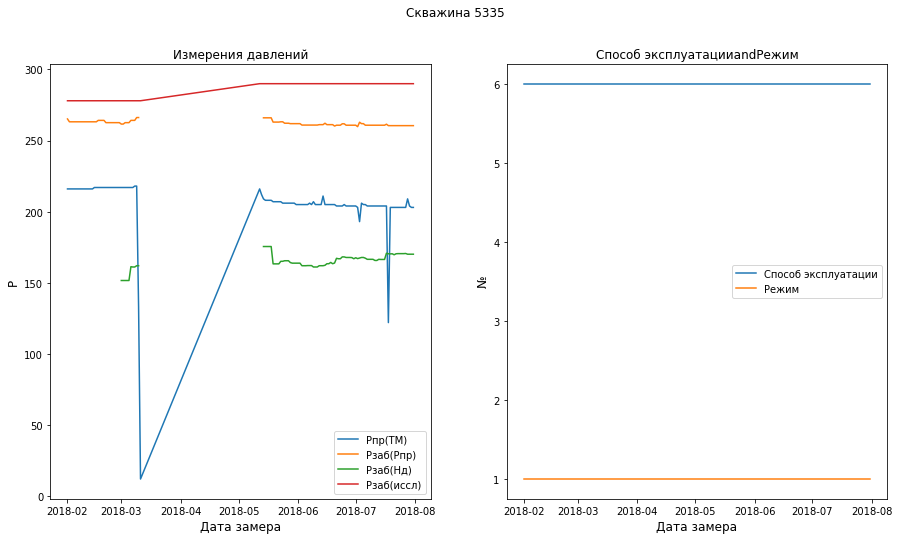

In [144]:
f
for h in targets.index.unique():
    draw_plot(h, final[final[hole] == h], what_to_do = 'save' ) 

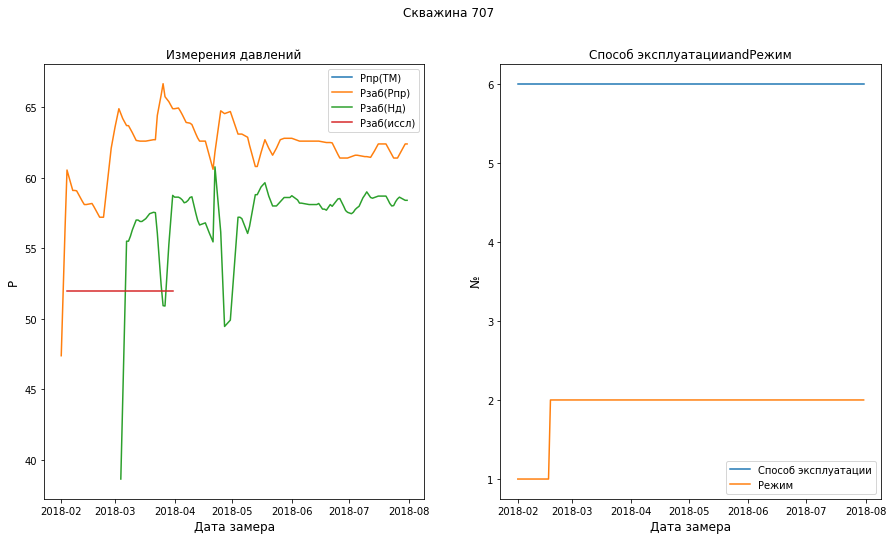

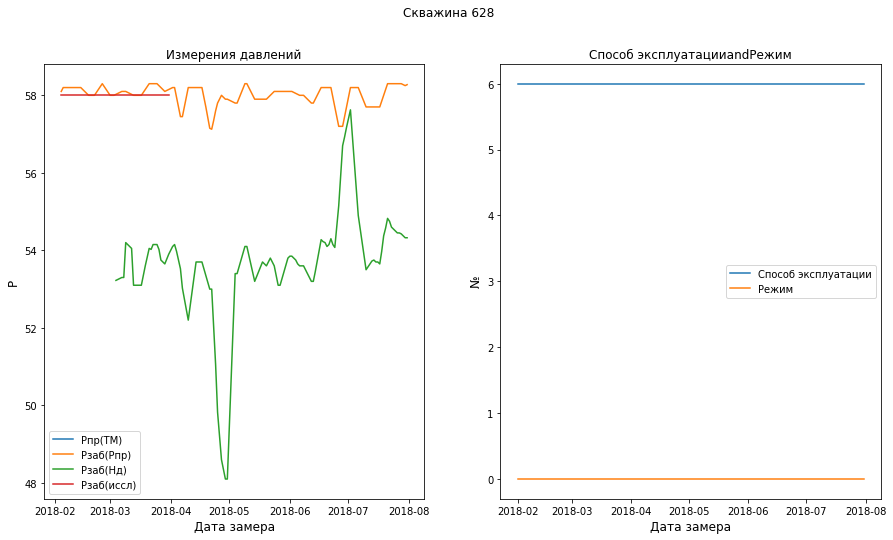

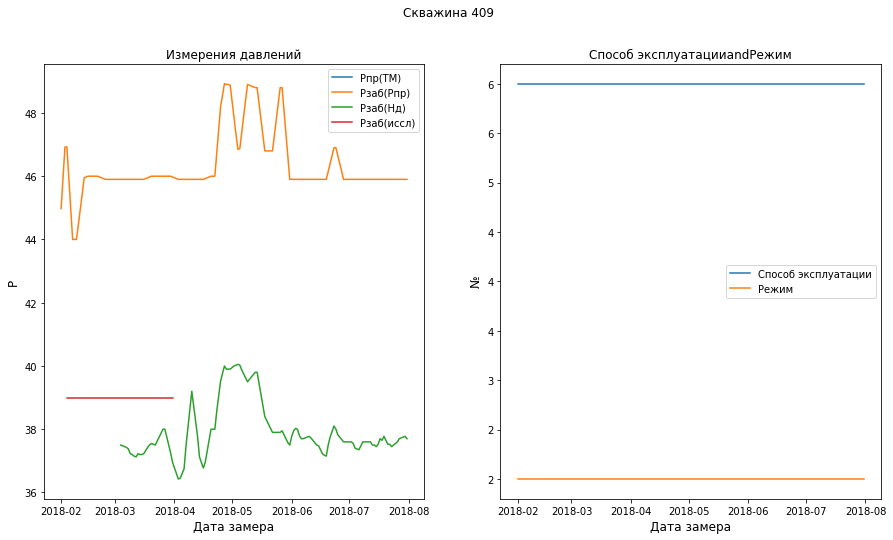

In [133]:
for h in targets.index.unique()[:3]:
    draw_plot(h, final[final[hole] == h])

In [145]:
print(cats_x1)
print(cats_x2)

Index(['Газлифт', 'По НКТ с воронкой', 'По НКТ с пакером',
       'Прочие способы эксплуатации',
       'Установка электроцентробежная для подачи воды', 'Фонтанный',
       'Электропогружным насосом'],
      dtype='object')
Index(['АПВ', 'ПДФ', 'ПКВ'], dtype='object')
